# Drone packages dataset EDA

Environment: Jupyter notebook

Libraries used in the task:
* pandas (for storing and and analyzing data) 
* numpy (for data computations) 
* matplotlib (for data visualization)
* scikit-learn (for linear regression and standardising data for modelling)
* math (for applying trigonometric functions)
* datetime (for parsing dates)

## 1. Introduction
The objective of this task is to perform EDA to understand the given dataset, identify errors in the data and fix the errors. The output of the task is a clean error-free dataset that can be used for analytics.  

The dataset is about a technologically advanaced logistics company that uses drones to deliver packages in Victoria, Australia. Some of the key information given about the dataset is:  
* There is a unique identifier for each delivery
* There are 3 drone types with different speeds in their phases of motion: Take-off, Landing and On-Route
* Deliveries are of express and normal post type
* Packages are delivered in Victoria, Australia
* Logistics company has a specific rule to classify time periods for deliveries:  Morning (6:00:00 - 11:59:59), Afternoon
(12:00:00 - 20:59:59), and Night (21:00 - 5:59:59)
* The Delivery Fare has a linear relationship with some other attributes  

## 2.  Import libraries 

In [1]:
# Code to import libraries that are needed for this task:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from math import sin, cos, sqrt, atan2, radians, floor
from datetime import datetime
%matplotlib inline

## 3. Data Cleansing process

### 3.1 Loading and Understanding Data:

The first step in the cleansing process is to load the data, and get a better understanding from the data from the summaries of the variables:

In [2]:
data = pd.read_csv("drone_packages_data.csv")

Checking the dimensionality of the data and the first few rows of the data:

In [3]:
print (data.shape) 
data.head()

(36349, 16)


,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
0,ID1708827283,1.0,0.0,13.180,10.0,44.0,-38.265729,148.241367,-38.234095,142.785208,476.918,2018-06-22,13:23:57,468.71,21:12:39,118.10
1,ID5418237997,2.0,1.0,32.099,22.0,11.0,-38.286010,147.621370,-36.593234,147.794268,189.053,2018-04-02,16:42:54,176.39,19:39:17,163.32
2,ID1113899320,3.0,0.0,21.569,54.0,28.0,-38.231352,146.557149,-38.921350,143.397649,285.465,2018-02-23,09:03:04,241.82,13:04:53,173.53
3,ID5760876185,2.0,1.0,23.038,36.0,30.0,-37.910532,144.370611,-37.703192,148.445498,359.098,2018-04-06,03:14:02,328.67,8:42:42,187.87
4,ID5551699692,3.0,1.0,19.246,37.0,21.0,-36.828298,143.278665,-38.720634,146.568641,357.968,2018-07-26,10:09:28,301.41,15:10:52,209.11


We have 36,359 rows and 16 columns.  

From observing the first few rows and the information provided to us, we can identify the data types for the attributes:  
* Numerical attributes: Package Weight, Journey Distance, Travel Time, Delivery Fare
* Categorical attributes: Drone Type, Post Type, Origin Region, Destination Region
* Datetime attributes: Departure Date, Departure Time, Delivery Time
* Geological attributes: Origin Latitude, Origin Longitude, Destination Latitude, Destination Longitude (will be stored as numeric data types)

Checking the default data types for the attributes read by Pandas library:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     36326 non-null  object 
 1   Drone Type             36339 non-null  float64
 2   Post Type              36329 non-null  float64
 3   Package Weight         36349 non-null  float64
 4   Origin Region          36339 non-null  float64
 5   Destination Region     36339 non-null  float64
 6   Origin Latitude        36349 non-null  float64
 7   Origin Longitude       36349 non-null  float64
 8   Destination Latitude   36349 non-null  float64
 9   Destination Longitude  36349 non-null  float64
 10  Journey Distance       36349 non-null  float64
 11  Departure Date         36349 non-null  object 
 12  Departure Time         36349 non-null  object 
 13  Travel Time            36309 non-null  float64
 14  Delivery Time          36349 non-null  object 
 15  De

Observing the summaries of numerical variables in the data: 

In [5]:
data.describe()

,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Travel Time,Delivery Fare
count,36339.000000,36329.000000,36349.000000,36339.000000,36339.000000,36349.000000,36349.000000,36349.000000,36349.000000,36349.000000,36309.000000,36319.000000
mean,1.695369,0.298715,25.734539,27.468973,27.342442,-37.693894,145.449390,-37.694047,145.442623,222.487110,211.224399,141.243399
std,0.779465,0.457701,12.117632,15.546951,15.521693,1.920451,7.043337,1.918864,7.057144,116.771701,108.052944,62.272817
min,1.000000,0.000000,5.000000,1.000000,1.000000,-39.006991,-148.258542,-39.006991,-147.978801,1.275000,8.410000,64.060000
25%,1.000000,0.000000,15.357000,14.000000,14.000000,-38.346984,144.026777,-38.344785,144.008570,130.974000,126.620000,107.845000
50%,1.000000,0.000000,25.562000,27.000000,27.000000,-37.758938,145.520374,-37.757317,145.508529,208.584000,198.780000,133.340000
75%,2.000000,1.000000,36.073000,41.000000,41.000000,-37.093232,147.190195,-37.090480,147.186543,303.674000,285.420000,164.330000
max,3.000000,1.000000,55.997000,54.000000,54.000000,38.954084,148.450906,38.984534,148.450906,557.218000,543.530000,1288.740000


Some of the observations and additional information from the above data summary are:

* Origin Region and Destination Region have 54 categories and must be classifed into these categories based on Latitude & Longitude of Origin and Destination respectively
* The maximum values for the latitudes is around 38 degrees, which is odd given that the deliveries are in Australia, which is in the Southern Hemisphere
* Similarly, the minimum value for longitude is -148 degrees, which is again odd given that we are on the right side (positive) of GMT
* There are missing values in several columns, which need to be replaced / imputed
* The average package weight is 25 units (mostly Kgs?)  

Doing a similar summary for the object variables:  

In [6]:
data.describe(include = ['O'])

,Id,Departure Date,Departure Time,Delivery Time
count,36326,36349,36349,36349
unique,36289,279,29707,29695
top,ID1450962719,2018-02-28,08:28:13,1:18:06
freq,2,227,5,5


Some of the key observations for these variables are:

* There are missing values in ID as the count is not 36349
* Some IDs are duplicated as the unique count is not equal to the total count
* The highest number of deliveries on a given day occurred on 28/02/2018

### 3.2 Syntactic Anomalies

As the name suggests, syntactical errors are errors with the syntax of a variable. These errors include syntactical errors, formatting mistakes, lexical errors, typos and irregularities in the variables.

The approach here would be to observe syntactical anomalies in the dataset for each variable. While looking for anomalies, we will plot the distribution for the numerical variables and get the frequencies for the categorical variables to understand the variables better.

Starting with the scrutiny of the numerical variables:  

In [7]:
data['Drone Type'].value_counts()

1.0    18260
2.0    10889
3.0     7190
Name: Drone Type, dtype: int64

In [8]:
data['Post Type'].value_counts()

0.0    25477
1.0    10852
Name: Post Type, dtype: int64

So far so good, no syntactical errors.  

Some observations of the data are that ~70% of the deliveries are normal post type. "Drone Type 1" is the most frequent drone type used for the deliveries 

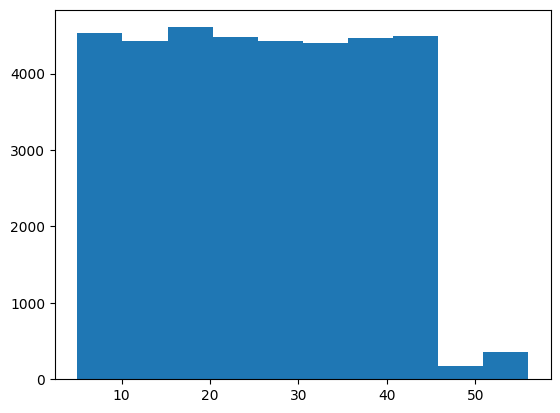

In [9]:
plt.hist(data['Package Weight'])
plt.show()

Package weights have a uniformish distribution until ~45 units.

In [10]:
data['Origin Region'].value_counts().head() # remove head to see entire frequency distribution

27.0    768
8.0     726
40.0    717
15.0    715
18.0    710
Name: Origin Region, dtype: int64

In [11]:
data['Destination Region'].value_counts().head() # remove head to see entire frequency distribution

28.0    730
31.0    722
13.0    719
41.0    712
39.0    708
Name: Destination Region, dtype: int64

So far, things seem okay with there being no syntactical errors in the columns.

<Axes: >

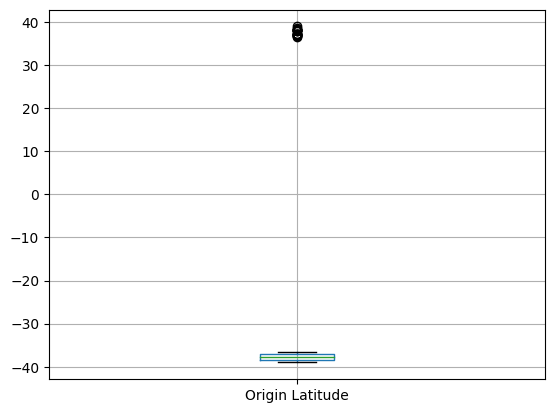

In [12]:
data.boxplot(column='Origin Latitude')

The Latitudes for few records do not follow the same syntax and respresent 38 degrees South as 38 and not as -38. This error needs to fixed for few records being flagged as outliers in the above boxplot

<Axes: >

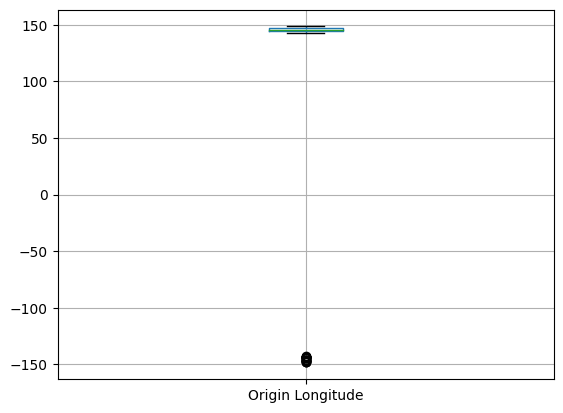

In [13]:
data.boxplot(column='Origin Longitude')

Similarly, for longitudes there is a syntax error for few records with negative longitude, which as mentioned is not possible as Australia is on the right of GMT. These longitudes need to be fixed as well.

Similar issues are present for the destination latitudes and longitudes. Uncomment and run the below codes to observe the boxplots for destination columns 

In [14]:
#data.boxplot(column='Destination Latitude', figsize = (8,8))

In [15]:
#data.boxplot(column='Destination Longitude', figsize = (8,8))

As we can observe, for ~20 of the records the origin latitude and longitude have a wrong sign, it could be that they are using a different format (for Example: 38 degrees South instead of -38 degrees). Fix the incorrect latitudes and longitudes by updating the sign:

In [16]:
data['Origin Latitude'] = -1*abs(data['Origin Latitude']) 
data['Origin Longitude'] = abs(data['Origin Longitude']) 
data['Destination Latitude'] = -1*abs(data['Destination Latitude']) 
data['Destination Longitude'] = abs(data['Destination Longitude']) 

Continuing to observe the remaining columns:

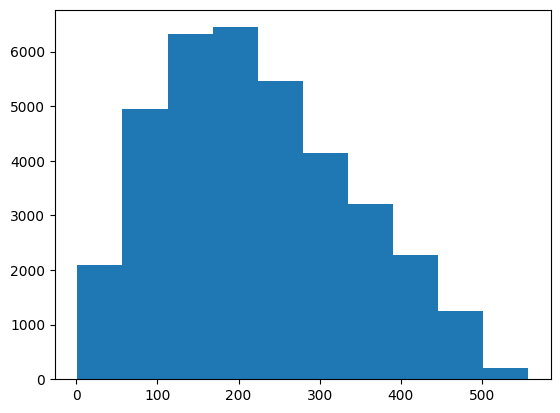

In [17]:
plt.hist(data['Journey Distance'])
plt.show()

Journey Distance has a right-skewed distribution, but the good news is that it is somewhat normalish. Some of the values on the upper end (> 500) seem to be extreme. Using a boxplot to check for outliers:  

<Axes: >

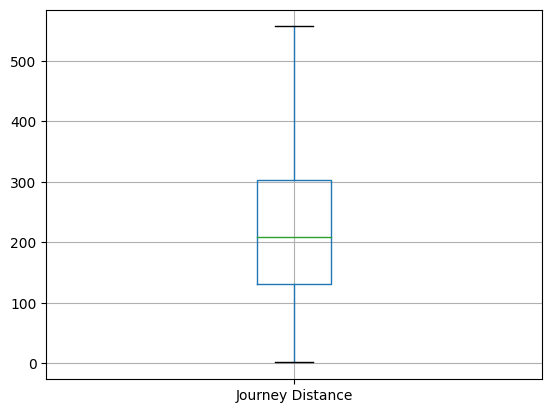

In [18]:
data.boxplot(column='Journey Distance')

There are no outliers in Journey Distance.

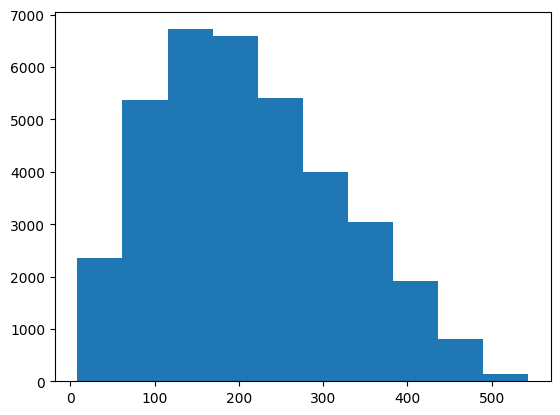

In [19]:
plt.hist(data.loc[data['Travel Time'].notna(),'Travel Time'], range = 
         (data['Travel Time'].min(),data['Travel Time'].max()), )
plt.show()

Similar to Journey Distance, the Travel Time has a right-skewed distribution, which is somewhat normalish. Wait a second, the distribution is almost the same as Journey Distance. This makes sense given that distance and time must have a relation beween them as longer distances require more time keeping the speed as constant. We will explore them together in the next sub-section

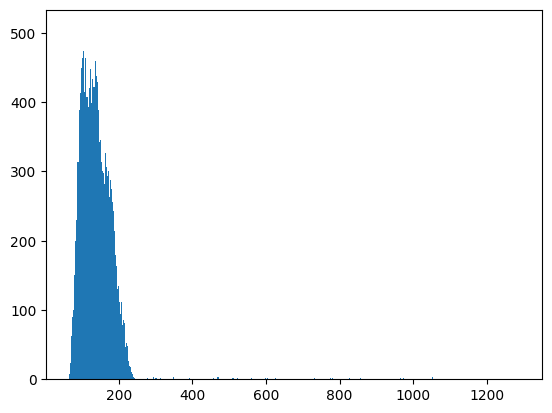

In [20]:
plt.hist(data.loc[data['Delivery Fare'].notna(),'Delivery Fare'], bins=1000,range = 
         (data['Delivery Fare'].min(),data['Delivery Fare'].max()), )
plt.show()

The Delivery Fare seems to have a multimodal distribution, though it is not very different from a normal distribution. It seems to have extreme values; plotting the boxplot for Delivery Fare:

<Axes: >

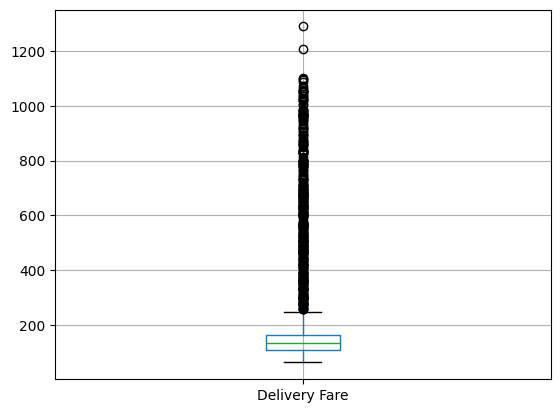

In [21]:
data.boxplot(column='Delivery Fare') #, figsize = (8,8))

No Syntactical errors in delivery fare, but there are quite a few outliers. We will tackle outliers later after cleaning up the data.  

Moving onto the 'object variables':  

In [22]:
data.describe(include = 'O')

,Id,Departure Date,Departure Time,Delivery Time
count,36326,36349,36349,36349
unique,36289,279,29707,29695
top,ID1450962719,2018-02-28,08:28:13,1:18:06
freq,2,227,5,5


In [23]:
#data.Id.value_counts() 
data.Id.head()

0    ID1708827283
1    ID5418237997
2    ID1113899320
3    ID5760876185
4    ID5551699692
Name: Id, dtype: object

ID seems okay syntactically with every ID starting with "ID" and having the same number of digits. The duplicated IDs and missing IDs, as identifed earlier will be handled later.  

For Departure Date, the format from the first few rows seemed to be year-month-date:  

In [24]:
data['Departure Date2'] = pd.to_datetime(data['Departure Date'], format='%Y-%m-%d',infer_datetime_format=True, 
                                         errors='coerce')

In [25]:
data.describe(include = ['O,','datetime'])

/var/folders/tx/fb38dryj2vj3swy11t82j2sm0000gn/T/ipykernel_17535/2973553395.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include = ['O,','datetime'])


,Id,Departure Date,Departure Time,Delivery Time,Departure Date2
count,36326,36349,36349,36349,36120
unique,36289,279,29707,29695,198
top,ID1450962719,2018-02-28,08:28:13,1:18:06,2018-02-28 00:00:00
freq,2,227,5,5,227
first,NaN,NaN,NaN,NaN,2018-01-01 00:00:00
last,NaN,NaN,NaN,NaN,2018-07-28 00:00:00


There are ~130 missing values in Departure Date 2, trying another format: year-date-month 

In [26]:
data['Departure Date3'] = pd.to_datetime(data['Departure Date'], format='%Y-%d-%m', 
                                         infer_datetime_format=True,errors='coerce')
data.describe(include = ['O','datetime'])

/var/folders/tx/fb38dryj2vj3swy11t82j2sm0000gn/T/ipykernel_17535/4267395334.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include = ['O','datetime'])
/var/folders/tx/fb38dryj2vj3swy11t82j2sm0000gn/T/ipykernel_17535/4267395334.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include = ['O','datetime'])


,Id,Departure Date,Departure Time,Delivery Time,Departure Date2,Departure Date3
count,36326,36349,36349,36349,36120,15758
unique,36289,279,29707,29695,198,162
top,ID1450962719,2018-02-28,08:28:13,1:18:06,2018-02-28 00:00:00,2018-08-02 00:00:00
freq,2,227,5,5,227,209
first,NaN,NaN,NaN,NaN,2018-01-01 00:00:00,2018-01-01 00:00:00
last,NaN,NaN,NaN,NaN,2018-07-28 00:00:00,2018-12-07 00:00:00


Checking whether we were able to identify the correct dates using the second format:

In [27]:
data.loc[data['Departure Date2'].isna(), ['Departure Date', 'Departure Date2','Departure Date3']].head()

,Departure Date,Departure Date2,Departure Date3
896,2018-18-07,NaT,2018-07-18
912,2018-19-01,NaT,2018-01-19
920,2018-24-02,NaT,2018-02-24
928,2018-24-03,NaT,2018-03-24
946,2018-18-02,NaT,2018-02-18


Summing up, most of the records follow month first format, while ~130 records follow date first format. We need to combined the two parsed Departure Dates in different formats into a single column with the correct Departure Date 

In [28]:
data['Departure Date4'] = data['Departure Date2'].combine_first(data['Departure Date3'])

Check for any missing values in the consolidated departure date column (Departure Date 4):  

In [29]:
data[data['Departure Date4'].isna()]['Departure Date'].value_counts()

2018-04-31    39
2018-02-30    33
2018-06-31    28
Name: Departure Date, dtype: int64

The dates that could not be parsed are invalid dates: 31st April, 30th February, and 31st June. Replacing these invalid dates by the next valid date:

In [30]:
# reference 1. Chris Albon. https://chrisalbon.com/python/basics/strings_to_datetime/   
data.loc[data['Departure Date'] == '2018-04-31','Departure Date4'] = datetime.strptime('2018-05-01','%Y-%m-%d') 
data.loc[data['Departure Date'] == '2018-02-30','Departure Date4'] = datetime.strptime('2018-03-01','%Y-%m-%d')
data.loc[data['Departure Date'] == '2018-06-31','Departure Date4'] = datetime.strptime('2018-07-01','%Y-%m-%d')

Checking that the invalid dates were replaced correctly in Departure Date 4:

In [31]:
print(data['Departure Date4'].isna().sum()) # should be 0
data.loc[data['Departure Date'].isin(['2018-06-31','2018-02-30','2018-04-31']),['Departure Date','Departure Date4']].head()

0


,Departure Date,Departure Date4
1317,2018-02-30,2018-03-01
1377,2018-06-31,2018-07-01
1439,2018-04-31,2018-05-01
1823,2018-06-31,2018-07-01
1885,2018-04-31,2018-05-01


Now, we have the correct dates in Departure Date 4, convert them into the correct format and replace them in Departure Date column. After this step, the intermediate columns: Departure Date 2, Departure Date 3 and Departure Date 4 can be dropped.

In [32]:
def date_extract(input_date):
    output = str(input_date.year) + '-' + '{0:0>2}'.format(input_date.month) + '-' + '{0:0>2}'.format(input_date.day)
    #output = str(input_date.date)
    return output

data['Departure Date'] = data['Departure Date4'].apply(date_extract)

data.drop(columns=['Departure Date2', 'Departure Date3', 'Departure Date4'],inplace = True)

All the syntactic anomalies in Departure Date are now fixed, checking for anaomalies in Departure Time and Travel Time: 

From the first few rows, we can observe that the time is the 24 hour format: Hours:Minutes:Seconds like 21:10:50. We can parse the columns with this format and check for any inconsistent formats.

In [33]:
# parsing time columns
data['Departure Time2'] = pd.to_datetime(data['Departure Time'], format='%H:%M:%S', errors='coerce')
data['Delivery Time2'] = pd.to_datetime(data['Delivery Time'], format='%H:%M:%S', errors='coerce')

data.describe(include = ['O','datetime'])

/var/folders/tx/fb38dryj2vj3swy11t82j2sm0000gn/T/ipykernel_17535/2623135878.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include = ['O','datetime'])
/var/folders/tx/fb38dryj2vj3swy11t82j2sm0000gn/T/ipykernel_17535/2623135878.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include = ['O','datetime'])


,Id,Departure Date,Departure Time,Delivery Time,Departure Time2,Delivery Time2
count,36326,36349,36349,36349,36349,36349
unique,36289,198,29707,29695,29697,29687
top,ID1450962719,2018-03-01,08:28:13,1:18:06,1900-01-01 16:55:20,1900-01-01 20:03:05
freq,2,229,5,5,5,5
first,NaN,NaN,NaN,NaN,1900-01-01 00:00:11,1900-01-01 00:00:00
last,NaN,NaN,NaN,NaN,1900-01-01 23:59:59,1900-01-01 23:59:59


The parsing happened correctly, from the summary it looks there are no inconsistent formats in the time columns. Checking further whether the parsed time is equal to the actual time in the dataset:

In [34]:
def time_extract(datetime):
     return str(datetime.time())
# new columns for checking whether the times are correct
data['Departure Time3'] = data['Departure Time2'].apply(time_extract)
data['Delivery Time3'] = data['Delivery Time2'].apply(time_extract)

In [35]:
# Check Departure Time
data.loc[data['Departure Time'] != data['Departure Time3'],['Departure Time','Departure Time3']].head()

,Departure Time,Departure Time3
848,5:25:48,05:25:48
2901,2:09:55,02:09:55
6961,2:11:40,02:11:40
11107,7:03:19,07:03:19
12156,1:20:40,01:20:40


Everything looks correct, there is only padding difference.

In [36]:
# Check Delivery Time
data.loc[data['Delivery Time'] != data['Delivery Time3'],['Delivery Time','Delivery Time3']].head()

,Delivery Time,Delivery Time3
3,8:42:42,08:42:42
5,1:59:04,01:59:04
7,9:56:25,09:56:25
8,9:45:09,09:45:09
10,6:07:04,06:07:04


Same comments as Departure Time. No inconsistent formats, with only padding difference for the hours.

Dropping the intermediate columns used for data validation:

In [37]:
# Getting rid off extra columns
data.drop(columns=['Departure Time2', 'Departure Time3', 'Delivery Time2', 'Delivery Time3'],inplace = True)

We are done with checking for syntactic errors in all columns.

### 3.3 Semantic Anomalies

Semantic errors are those errors that violate the relationships between columns or have redundant records / information in the dataset. These errors include: Duplicates, contradictions and violations of integrity constraints between columns.

#### 3.3.1 Duplicates
We need to remove duplicate tuples in the data.

From the observation of the summaries, we know that the IDs were duplicated for some records and missing for some records. Investigating the records further using the ID column:

In [38]:
#IDs not present for few records and are duplicate 
# check duplicate IDs
dup_ids_logical = (data['Id'].notna()) & (data["Id"].duplicated(keep = 'first')) 
dup_ids = data.loc[dup_ids_logical,"Id"] # Store the duplicate IDs that appears second
data[data["Id"].isin(dup_ids)].sort_values(by = "Id").head(6)

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
36304,ID1155251057,3.0,0.0,34.367,32.0,48.0,-37.262292,146.194652,-37.077754,145.904855,32.905,2018-06-11,16:55:32,34.24,17:29:46,160.82
34214,ID1155251057,3.0,0.0,34.367,32.0,48.0,-37.262292,146.194652,-37.077754,145.904855,32.905,2018-06-11,16:55:32,34.24,17:29:46,160.82
29677,ID1280400363,3.0,0.0,22.022,49.0,19.0,-38.829531,144.945663,-38.911880,143.886775,92.227,2018-05-23,21:40:58,83.00,23:03:58,177.37
36292,ID1280400363,3.0,0.0,22.022,49.0,19.0,-38.829531,144.945663,-38.911880,143.886775,92.227,2018-05-23,21:40:58,83.00,23:03:58,177.37
36319,ID1292363640,3.0,0.0,29.646,49.0,16.0,-38.938454,144.882245,-36.986370,145.395799,221.924,2018-07-02,11:01:40,189.60,14:11:15,166.40
21046,ID1292363640,3.0,0.0,29.646,49.0,16.0,-38.938454,144.882245,-36.986370,145.395799,221.924,2018-07-02,11:01:40,189.60,14:11:15,166.40


We can clearly observe that the records with duplicate IDs are the same records; in other words they are duplicate tuples. Hence, we can delete one of the two duplicated records.

Deleting the second duplicated record:

In [39]:
# remove rows with duplicates
data.drop(data[dup_ids_logical].index, axis=0, inplace=True)

data.describe(include = 'O') # Quality Check

,Id,Departure Date,Departure Time,Delivery Time
count,36289,36312,36312,36312
unique,36289,198,29707,29695
top,ID1708827283,2018-03-01,16:55:20,3:21:23
freq,1,229,5,5


We can see that the dropping of the second duplicated record happened correctly because the no. of rows reduced to 36289 and the frequency for top ID is 1. 

However, there are few records with missing IDs. Let's investigate records with missing IDs further:

In [40]:
potential_duplicates = data.duplicated(subset=data.columns[1:], keep= False) # Checking duplicates excluding ID
data.loc[potential_duplicates,].sort_values(by=['Delivery Fare','Id']).head(6) # remove head to see all records

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
16487,ID1688908127,1.0,0.0,45.063,50.0,40.0,-36.570684,142.949228,-36.681076,144.302909,121.556,2018-05-24,21:17:24,124.81,23:22:12,99.79
36315,NaN,1.0,0.0,45.063,50.0,40.0,-36.570684,142.949228,-36.681076,144.302909,121.556,2018-05-24,21:17:24,124.81,23:22:12,99.79
33855,ID1831522808,1.0,0.0,41.716,51.0,12.0,-37.457216,148.176328,-38.947218,147.198020,186.636,2018-05-05,01:51:19,187.79,4:59:06,107.89
36310,NaN,1.0,0.0,41.716,51.0,12.0,-37.457216,148.176328,-38.947218,147.198020,186.636,2018-05-05,01:51:19,187.79,4:59:06,107.89
35985,ID1257083808,1.0,0.0,12.206,5.0,2.0,-37.172516,148.312908,-38.132562,145.195466,294.782,2018-03-19,22:54:06,292.45,3:46:32,114.39
36290,NaN,1.0,0.0,12.206,5.0,2.0,-37.172516,148.312908,-38.132562,145.195466,294.782,2018-03-19,22:54:06,292.45,3:46:32,114.39


The above view of the data sorted by Delivery Fare and ID clearly shows that the rows that have missing IDs are duplicates of another row in the dataset. Hence, we must drop the rows with missing IDs.

In [41]:
# As we can see, the ID is missing for duplicate rows. Hence we can drop all the rows with missing IDs
data.dropna(axis = 0, subset=['Id'],inplace=True)

data.Id.isna().sum() #Check should be 0

0

#### 3.3.2 Violations

We now move onto checking violations in the dataset. Violations are nothing but contradictions which do not follow the true relationship between the columns.

The first relationship between columns that comes to my mind is that the Journey Distance can be calculated from the latitudes & longitudes of the origin and destination points. The distance between two coordinates can be computed using a trigonometric formula that considers the radius of the earth. 

In [42]:
# Journey Distance using the fomula for latitudes and longitudes
# Reference 2 #https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude

R = 6378.0

def computedDistance(org_lat,dest_lat,org_long,dest_long):
    org_lat = radians(org_lat)
    dest_lat = radians(dest_lat)
    org_long = radians(org_long)
    dest_long = radians(dest_long)

    dlat = dest_lat - org_lat
    dlon = dest_long - org_long
    
    a = sin(dlat / 2)**2 + cos(org_lat) * cos(dest_lat) * sin(dlon / 2)**2
    b = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = round(R * b,3)
    return distance

Using the above function to compute the journey distance:

In [43]:
data['Computed Distance'] = np.vectorize(computedDistance)(data['Origin Latitude'], data['Destination Latitude'],
                                                          data['Origin Longitude'], data['Destination Longitude'])
# Reference 3. Applying function with multiple arguments to create a new column
# https://stackoverflow.com/questions/19914937/applying-function-with-multiple-arguments-to-create-a-new-pandas-column

data.loc[:5,['Computed Distance','Journey Distance']] # Quality Check

,Computed Distance,Journey Distance
0,476.918,476.918
1,189.053,189.053
2,285.465,285.465
3,359.098,359.098
4,357.968,357.968
5,141.049,141.049


We now need to compare the Computed Journey Distance vs. Given Journey Distance:

In [44]:
def distanceCheck(given,computed):
    if round(given,3) == round(computed,3):
        return True
    else:
        return False

data['Distance Logical'] = np.vectorize(distanceCheck)(data['Computed Distance'],data['Journey Distance'])

data.loc[data['Distance Logical'] == 0,['Computed Distance', 'Journey Distance', 'Distance Logical']].head()

,Computed Distance,Journey Distance,Distance Logical
246,487.353,491.853,False
2265,399.991,400.191,False
4340,175.831,174.831,False
8410,380.527,383.727,False
9078,260.402,267.502,False


There are some records for which there are discrepancies between the computed distance and given distance. Calculating the number of such records:

In [45]:
data['Distance Logical'].value_counts()

True     36274
False       15
Name: Distance Logical, dtype: int64

Fixing the Journey Distance for these 15 records:

In [46]:
data.loc[data['Distance Logical'] == 0,'Journey Distance'] = data.loc[data['Distance Logical'] == 0,'Computed Distance']
# Check if it happened correctly
data.loc[data['Distance Logical'] == 0,['Computed Distance', 'Journey Distance', 'Distance Logical']].head()

,Computed Distance,Journey Distance,Distance Logical
246,487.353,487.353,False
2265,399.991,399.991,False
4340,175.831,175.831,False
8410,380.527,380.527,False
9078,260.402,260.402,False


We can now drop the intermediate columns: Computed Distance and Distance Logical:

In [47]:
data.drop(axis = 0, columns = ['Computed Distance', 'Distance Logical'], inplace = True)

Another relationship between the columns is between Journey Distance and Travel Time. Remember we observed that the distributions of these columns was similar with larger distances taking longer time. From high school physics, we know the formula: $Distance = Speed * Time$

We also know the drones have 3 different speeds in their different phases of motion. Each drone type may have different speeds as well, may be the fastest drone is used for express deliveries. To investigate this we need to compute the drone speeds.First, splitting the dataset into 3 parts based on the drone type. 

In [48]:
data_drone_1 = data.loc[data['Drone Type'] == 1,['Drone Type','Travel Time', 'Journey Distance']]
data_drone_2 = data.loc[data['Drone Type'] == 2,['Drone Type','Travel Time', 'Journey Distance']]
data_drone_3 = data.loc[data['Drone Type'] == 3,['Drone Type','Travel Time', 'Journey Distance']]

Now we are given that the take off and landing phases take 5 minutes each. We can derive an equation for relating the travel time and Journey Distance: 

$Journey\ Distance = ((5 * TakeOff\ Speed) + (5 * Landing\ Speed) + (Travel\ Time - 10) * (OnRoute\ Speed))\ /\ 60$.  
We divide by 60 as the speeds are in km/hr.

From the above equation, we can get an equation for the travel time:
$ Travel\ Time = 5 + 5 + ( Journey\ Distance - (TakeOff\ Speed + Landing\ Speed) / 12) / OnRoute\ Speed * 60)$
$ Travel\ Time = 10 + ( Journey\ Distance - (TakeOff\ Speed + Landing\ Speed) / 12) / OnRoute\ Speed * 60)$

We now need to solve the simaltaneous equations for computing the drone speeds. Note that the coefficients for the TakeOff speed and Landing Speed are the same, hence it will not be possible to compute them. Instead, we can use the Travel Time equation and compute the OnRoute Speed and the Sum of TakeOff and Landing Speeds.

Action time, computing the drone speeds for each drone type using the first two records:

In [49]:
# Drone Type 1
A1 = np.array([[5,5],(data_drone_1.iloc[:2,1].values - 10)]).transpose() / 60
B1 = np.array((data_drone_1.iloc[:2,2].values))
speed_1 = np.linalg.solve(A1, B1)
#print(A1)
#print(B1)
print(speed_1)

[34.91028107 62.00110875]


In [50]:
# Done Type 2
A2 = np.array([[5,5],(data_drone_2.iloc[:2,1].values - 10)]).transpose() / 60
B2 = np.array((data_drone_2.iloc[:2,2].values))
speed_2 = np.linalg.solve(A2, B2)
print(speed_2)

[39.0231119  66.99960599]


In [51]:
# Drone Type 3
A3 = np.array([[5,5],(data_drone_3.iloc[:2,1].values - 10)]).transpose() / 60
B3 = np.array((data_drone_3.iloc[:2,2].values))
speed_3 = np.linalg.solve(A3, B3)
print(speed_3)

[40.9224145  73.00184595]


Drone Type 1 is the slowest drone with a speed of 62 km / hr and drone type 3 is the fastest drone with a speed of 73 km / hr.

We can now compute the Travel Time based on the above drone speeds. We have 3 drones, we can compute 3 travel times based on the speeds of each drone.

In [52]:
#Computed Travel Time
# travel time = 10 + (distance - (x + y) / 12) / z

data['Computed Travel Time 1'] = round(10 + (data['Journey Distance'] - speed_1[0] / 12)/ speed_1[1] * 60,2)
data['Computed Travel Time 2'] = round(10 + (data['Journey Distance'] - speed_2[0] / 12)/ speed_2[1] * 60,2)
data['Computed Travel Time 3'] = round(10 + (data['Journey Distance'] - speed_3[0] / 12)/ speed_3[1] * 60,2)

Below, we create 3 new logical columns (True / False) where the Travel Time is equal to Computed Travel Time 1, Computed Travel Time 2 and Computed Travel Time 3. We now compare these newly created columns with the Travel Time present in the dataset based on the drone type i.e. for Drone Type 1, travel time should be equal to Computed Travel Time 1.

In [53]:
# There are a lot of rounding errors, hence the values are considered equal if they differ by 0.02
data['Travel Time Check 1'] = np.abs(data['Travel Time'] - data['Computed Travel Time 1']) <= 0.02

data['Travel Time Check 2'] = np.abs(data['Travel Time'] - data['Computed Travel Time 2']) <= 0.02

data['Travel Time Check 3'] = np.abs(data['Travel Time'] - data['Computed Travel Time 3']) <= 0.02


print(data.loc[(data['Travel Time Check 1'] == 0) & (data['Drone Type'] == 1), ].shape)
print(data.loc[(data['Travel Time Check 2'] == 0) & (data['Drone Type'] == 2), ].shape)
print(data.loc[(data['Travel Time Check 3'] == 0) & (data['Drone Type'] == 3), ].shape)

(54, 22)
(33, 22)
(6, 22)


We have ~90 records for which the travel times are not matching the computed travel time. These errors include missing values. Note that the error here could be either in the drone type or the travel time.

Let us handle the missing drone types first since they are easier to deal with in this situation. The approach here is simple, if the travel time is equal to computed travel time 1 (based on speed of drone type 1), then the drone type is 1; similarly for drone types 2 and 3. Before doing that, let us check that exactly one of the computed travel times match the travel time for rows with missing drone types:

In [54]:
# Compute Missing Values for Drone Type based on the travel time computed using the drone speed
# There should be exactly one value that is True out of the Travel Time Check columns for every row
data.loc[data['Drone Type'].isna(), ['Travel Time Check 1','Travel Time Check 2', 'Travel Time Check 3']].head()

,Travel Time Check 1,Travel Time Check 2,Travel Time Check 3
12,False,True,False
4117,False,False,True
7354,False,True,False
12297,True,False,False
18433,False,True,False


Good news, exactly one computed travel time matches the travel time for every record with missing drone types. We can go ahead and replace the missing values for the drone types.

In [55]:
# Filter correctly, replace missing values for the drone type based on speed
data.loc[(data['Drone Type'].isna()) & (data['Travel Time Check 1'] == 1), ['Drone Type']] = 1
data.loc[(data['Drone Type'].isna()) & (data['Travel Time Check 2'] == 1), ['Drone Type']] = 2
data.loc[(data['Drone Type'].isna()) & (data['Travel Time Check 3'] == 1), ['Drone Type']] = 3
data['Drone Type'].isna().sum() # Quality Check

0

It is time to tackle the incorrect drone types. The drone type is incorrect if the travel time matches the computed travel time based on speeds of another drone. For example, assume that for a delivery, the computed travel times based on the 3 drone types are 100, 150 and 200 respectively. If the drone type is 1 in the data and the travel time is 200; this indicates an incorrect drone type. Looking for such errors in the data:

In [56]:
# Example
data.loc[(data['Drone Type'] == 1) & (data['Travel Time Check 1'] == 0), ['Drone Type', 'Travel Time Check 1',
                                                                        'Travel Time Check 2' , 'Travel Time Check 3',
                                                                         'Travel Time', 'Computed Travel Time 1',
                                                                         'Computed Travel Time 2', 
                                                                          'Computed Travel Time 3']].head()

,Drone Type,Travel Time Check 1,Travel Time Check 2,Travel Time Check 3,Travel Time,Computed Travel Time 1,Computed Travel Time 2,Computed Travel Time 3
661,1.0,False,True,False,102.73,110.53,102.73,94.97
665,1.0,False,False,True,179.81,210.42,195.16,179.81
4196,1.0,False,False,False,NaN,482.70,447.13,411.06
4524,1.0,False,False,False,NaN,219.35,203.42,187.39
4755,1.0,False,False,True,201.10,235.49,218.36,201.10


For the first record, we can see that the drone type is 1, however the travel time is equal to the computed travel time 2. hence, the drone type needs to be changed to 2 for this record. This needs to be done for all records. Fixing the incorrect drone types based on the above approach: 

In [57]:
# Fixing incorrect drone type 1s
data.loc[(data['Drone Type'] == 1) & (data['Travel Time Check 2'] == 1), ['Drone Type']] = 2
data.loc[(data['Drone Type'] == 1) & (data['Travel Time Check 3'] == 1), ['Drone Type']] = 3
# Fixing incorrect and missing drone type 2
data.loc[(data['Drone Type'] == 2) & (data['Travel Time Check 1'] == 1), ['Drone Type']] = 1
data.loc[(data['Drone Type'] == 2) & (data['Travel Time Check 3'] == 1), ['Drone Type']] = 3
# Fixing incorrect and missing drone type 3
data.loc[(data['Drone Type'] == 3) & (data['Travel Time Check 1'] == 1), ['Drone Type']] = 1
data.loc[(data['Drone Type'] == 3) & (data['Travel Time Check 2'] == 1), ['Drone Type']] = 2

We need to ensure that the drone types were fixed correctly. Hence, the below cell is used to perform some quality checks:

In [58]:
# Quality Checking that everything is correct now
print(data.loc[(data['Drone Type'] == 1) & (data['Travel Time Check 1'] == 0) 
               & (data['Travel Time'].notna()), ['Drone Type']].shape) # Should be 0 rows

print(data.loc[(data['Drone Type'] == 2) & (data['Travel Time Check 2'] == 0) 
               & (data['Travel Time'].notna()), ['Drone Type']].shape) # Should be 0 rows

print(data.loc[(data['Drone Type'] == 3) & (data['Travel Time Check 3'] == 0) 
               & (data['Travel Time'].notna()), ['Drone Type']].shape) # Should be 0 rows

(0, 1)
(0, 1)
(0, 1)


The quality checks were passed successfully, we can proceed now to fixing the Travel Time.

Again, we handle the missing travel times first. We can compute the missing travel times based on the drone type. If the drone type is 1, the missing travel times can be replaced with computed travel time 1, similarly for drone types 2 and 3.

Also, now the drone types are correct (hopefully), we can consolidate all the computed travel times into 1 column with correct computed travel time based on the drone type. We can then use this column for imputing missing travel times.

In [59]:
#Consolidate all travel times into 1 column: "Computed Travel Time"
# For Drone Type 1
data.loc[data['Drone Type'] == 1, 'Computed Travel Time'] = \
    data.loc[data['Drone Type'] == 1, 'Computed Travel Time 1']
# For Drone Type 2
data.loc[data['Drone Type'] == 2, 'Computed Travel Time'] = \
    data.loc[data['Drone Type'] == 2, 'Computed Travel Time 2']
# For Drone Type 3
data.loc[data['Drone Type'] == 3, 'Computed Travel Time'] = \
    data.loc[data['Drone Type'] == 3, 'Computed Travel Time 3']

data['Computed Travel Time'].isna().sum() #Quality Check

0

Replacing missing travel times with the computed travel time below:

In [60]:
# replace missing values for travel time
data.loc[data['Travel Time'].isna(),'Travel Time'] = data.loc[data['Travel Time'].isna(),'Computed Travel Time']

It is now time to check for incorrect Travel Times based on the computed Travel Time:

In [61]:
# Checking for any incorrect travel times
data['Check'] = np.abs(data['Travel Time'] - data['Computed Travel Time']) <= 0.02

data.loc[data['Check'] == 0, ['Travel Time', 'Computed Travel Time']].shape

(0, 2)

It looks like there are no incorrect travel times. We can now move onto validating Departure Time and Delivery Time. Logically, the difference between the delivery time and departure time must be greater than the travel time. Checking the relationship between these different times:

In [62]:
data['Departure Time2'] = pd.to_datetime(data['Departure Time'], format='%H:%M:%S', errors='coerce')
data['Delivery Time2'] = pd.to_datetime(data['Delivery Time'], format='%H:%M:%S', errors='coerce')
data['time_diff'] = data['Delivery Time2'] - data['Departure Time2']

data.loc[:, ['Travel Time', 'Delivery Time', 'Departure Time', 'time_diff']].head()

,Travel Time,Delivery Time,Departure Time,time_diff
0,468.71,21:12:39,13:23:57,0 days 07:48:42
1,176.39,19:39:17,16:42:54,0 days 02:56:23
2,241.82,13:04:53,09:03:04,0 days 04:01:49
3,328.67,8:42:42,03:14:02,0 days 05:28:40
4,301.41,15:10:52,10:09:28,0 days 05:01:24


We can see that the travel time is equal to the difference between departure and delivery times. That makes sense because we have drones here and not humans doing the deliveries.

We cannot compare "time_diff" and travel time as "time_diff" is in timedelta format while travel time is in minutes. Converting "time_diff" to minutes and storing it as "time_diff_2": 

In [63]:
def time_diff_in_min(time_diff):
    return round(time_diff.seconds/60,2)

data['time_diff_2'] = data['time_diff'].apply(time_diff_in_min)

We can now compare time_diff_2 and travel time:

In [64]:
data['Times Relation Check'] = np.abs(data['time_diff_2'] - data['Travel Time']) <= 0.05

data['Times Relation Check'].count() - data['Times Relation Check'].sum() 

60

The times relation check is not true for 60 records. Taking a look at these records below:

In [65]:
data.loc[(data['Times Relation Check'] == 0),
    ['Departure Time','Delivery Time','Travel Time','time_diff','Times Relation Check', 'time_diff_2']].head()

,Departure Time,Delivery Time,Travel Time,time_diff,Times Relation Check,time_diff_2
794,10:06:21,09:54:06,12.26,-1 days +23:47:45,False,1427.75
807,14:14:06,09:26:11,287.93,-1 days +19:12:05,False,1152.08
848,5:25:48,01:08:47,257.02,-1 days +19:42:59,False,1182.98
871,23:03:22,22:10:55,52.46,-1 days +23:07:33,False,1387.55
2554,04:17:06,8:10:08,140.21,0 days 03:53:02,False,233.03


For some records, the delivery time is before the Departure Time. This is not possible as the delivery happens after the departure of a package. Swapping the times seems to result in a difference equal to the Travel Time. For example, for the first record Departure Time - Delivery Time = Travel Time. We need to swap the times for the records that have a time difference equal to the travel time but the departure time is after delivery time. 

Calculating the time difference after swapping the columns Departure Time and Delivery Time, and comparing with travel time:

In [66]:
# Delivery Time is before Departure Time for some records
data['swapped_time_diff'] = data['Departure Time2'] - data['Delivery Time2']
data['swapped_time_diff'] = data['swapped_time_diff'].apply(time_diff_in_min)

data['Swapped Travel Time Check'] = np.abs(data['swapped_time_diff'] - data['Travel Time']) <= 0.02

Computing the number of records for which the delivery time and departure time need to be swapped (swapped time difference is equal to travel time):

In [67]:
swap_indices = data['Swapped Travel Time Check']
print(swap_indices.sum(),'records for which we need to swap delivery time and departure time')

40 records for which we need to swap delivery time and departure time


Swapping the departure time and delivery time for the 40 records and re-computing the times relation check to validate the swapping operation:

In [68]:
# Swapping Departure Time and Delivery Time for the 40 records
# reference 4
# https://stackoverflow.com/questions/25792619/what-is-correct-syntax-to-swap-column-values-for-selected-rows-in-a-pandas-data
data.loc[swap_indices,['Delivery Time','Departure Time']] = data.loc[swap_indices,['Departure Time','Delivery Time']].values

# Checking
data['Departure Time2'] = pd.to_datetime(data['Departure Time'], format='%H:%M:%S', errors='coerce')
data['Delivery Time2'] = pd.to_datetime(data['Delivery Time'], format='%H:%M:%S', errors='coerce')
data['time_diff'] = data['Delivery Time2'] - data['Departure Time2']
data['time_diff_2'] = data['time_diff'].apply(time_diff_in_min)
data['Times Relation Check'] = np.abs(data['time_diff_2'] - data['Travel Time']) <= 0.05
data[(data['Times Relation Check'] == 0) & (data['Travel Time'].notna())].shape # should be 20 rows

(20, 31)

We now need to fix the remaining 20 rows with errors. For these 20 records, the travel time is correct, and we can assume that the departure time is correct, so we need to fix the delivery time. We now know that $Delivery\ Time = Departure\ Time + Travel\ Time$

For computing the delivery time, we cannot directly add the columns as travel time is in minutes. We need to convert it to Timedelta data type and add it to the Departure Time

In [69]:
# convert to Timedelta
data['Travel Timedelta'] = pd.to_timedelta(data['Travel Time'], unit='m')
data['Travel Timedelta'].head()

0   0 days 07:48:42.600000
1   0 days 02:56:23.400000
2   0 days 04:01:49.200000
3   0 days 05:28:40.200000
4   0 days 05:01:24.600000
Name: Travel Timedelta, dtype: timedelta64[ns]

Computing the delivery time and storing it in "Computed Delviery Time" column:

In [70]:
data['Computed Delivery Time'] = data['Departure Time2']  + data['Travel Timedelta']
data.loc[:6,['Computed Delivery Time', 'Delivery Time']] # Checking

,Computed Delivery Time,Delivery Time
0,1900-01-01 21:12:39.600,21:12:39
1,1900-01-01 19:39:17.400,19:39:17
2,1900-01-01 13:04:53.200,13:04:53
3,1900-01-01 08:42:42.200,8:42:42
4,1900-01-01 15:10:52.600,15:10:52
5,1900-01-02 01:59:04.000,1:59:04
6,1900-01-01 13:08:37.200,13:08:37


Convert the computed delivery time to a string and format it similar to the remaining records.

In [71]:
def datetimeFormatUpdate(input_time):
    output = str(input_time.hour) + ':' + '{0:0>2}'.format(input_time.minute) + ':' + '{0:0>2}'.format(input_time.second)
    return output

datetimeFormatUpdate(data.loc[5,'Computed Delivery Time'])

'1:59:04'

We can now replace the delivery time for these 20 records with the correctly formatted computed delivery time.

In [72]:
data['Computed Delivery Time'] = data['Computed Delivery Time'].apply(datetimeFormatUpdate)
data.loc[data['Times Relation Check'] == 0,['Departure Time', 'Delivery Time', 
                                            'Travel Time', 'Computed Delivery Time']].head() # check

,Departure Time,Delivery Time,Travel Time,Computed Delivery Time
2554,04:17:06,8:10:08,140.21,6:37:18
3971,18:47:23,0:42:20,293.02,23:40:24
6647,21:35:00,2:45:51,78.43,22:53:25
8704,22:15:22,0:12:17,290.83,3:06:11
10715,15:56:09,19:35:03,342.25,21:38:24


The delivery time is fixed for the incorrect records. Since we have fixed the time columns, we can create the time periods (morning / afternoon / evening) for departure and delivery time based on the business rules of the company. 

In [73]:
# Creating the morning/afternoon/night variables
def time_period(time):
    if time.hour >= 21 or time.hour < 6:
        return 'Night'
    elif time.hour >= 12:
        return 'Afternoon'
    else:
        return 'Morning'
    
data['Departure Time Period'] = data['Departure Time2'].apply(time_period)
data['Delivery Time Period'] = data['Delivery Time2'].apply(time_period)

In [74]:
data.loc[:10,['Departure Time', 'Departure Time Period', 'Delivery Time', 'Delivery Time Period']].head() # check

,Departure Time,Departure Time Period,Delivery Time,Delivery Time Period
0,13:23:57,Afternoon,21:12:39,Night
1,16:42:54,Afternoon,19:39:17,Afternoon
2,09:03:04,Morning,13:04:53,Afternoon
3,03:14:02,Night,8:42:42,Morning
4,10:09:28,Morning,15:10:52,Afternoon


Finally, we fixed the errors in all the time columns, we can now drop all the intermediate columns.

In [75]:
data.drop(columns=['Departure Time2', 'Delivery Time2', 'time_diff', 'time_diff_2', 
                   'Times Relation Check', 'swapped_time_diff', 'Swapped Travel Time Check',
                  'Computed Travel Time 1', 'Computed Travel Time 2', 'Computed Travel Time 3',
                  'Travel Time Check 1', 'Travel Time Check 2', 'Travel Time Check 3',
                  'Check','Travel Timedelta', 'Computed Delivery Time', 'Computed Travel Time'],inplace = True)

We have resolved most of the relationships between columns (hopefully). One final relationship we can check is between the regions, latitudes and longitudes. We know that regions have definite boundaries; hence a region can de defined by a range of latitudes and longitudes.

Let us plot the region, latitudes and longitudes for the origin points and check whether there any discrepancies.

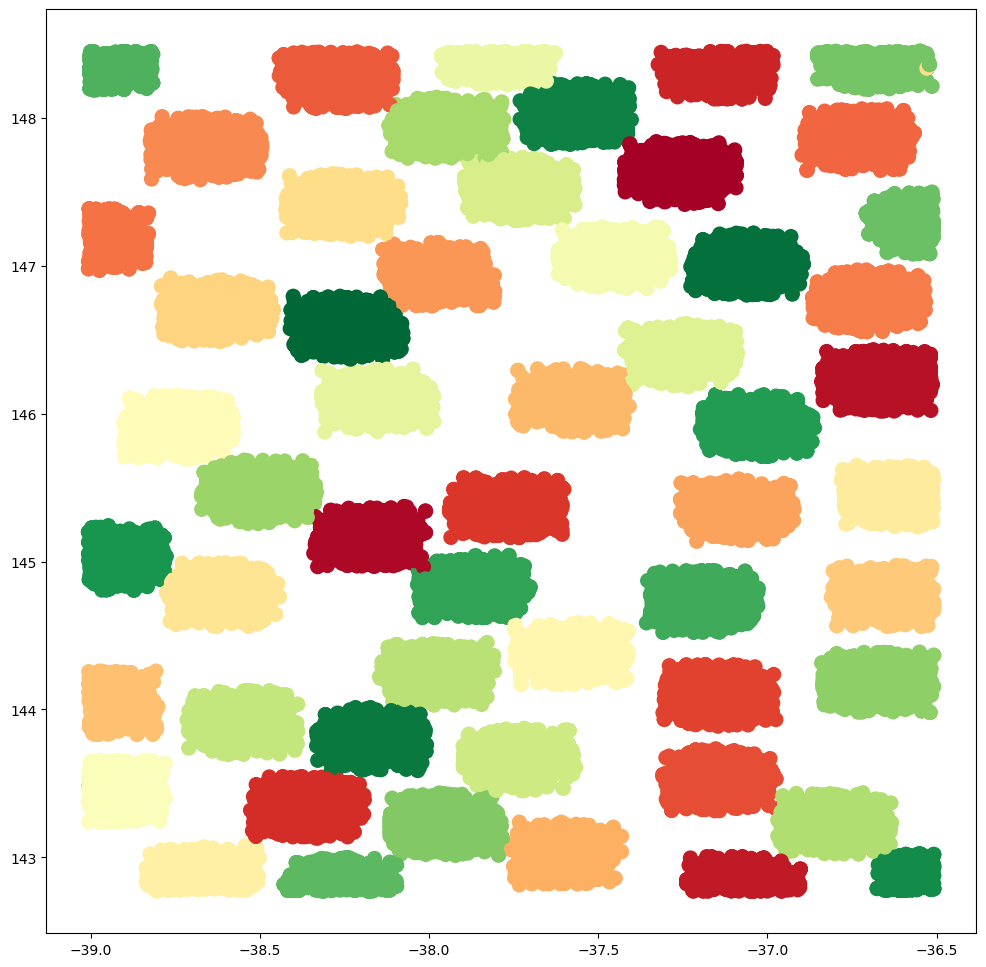

In [76]:
plt.figure(figsize=(12,12))
plt.scatter(data['Origin Latitude'], data['Origin Longitude'], 
            c= data['Origin Region'], s = 100,cmap=plt.cm.RdYlGn)
plt.show()

From the above plot, we can observe that for a few regions, there are some points that do not belong to that region. For example, in top right region, we can see that there is a yellow dot in a green region.  

If you are having difficulty spotting the errors, you can use a better visualisation tool like Tableau or QlikView. To make the errors evident in Python, plotting the origin latitudes by origin region: 

<Axes: title={'center': 'Origin Latitude'}, xlabel='Origin Region'>

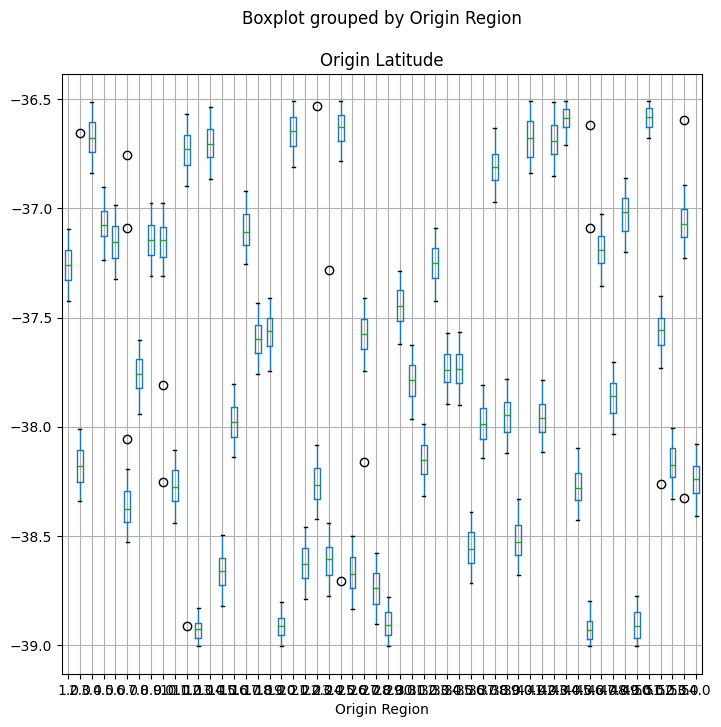

In [77]:
data.boxplot(column='Origin Latitude', by = 'Origin Region',figsize = (8,8))

# uncomment to see plot of longitudes
#data.boxplot(column='Origin Longitude', by = 'Origin Region',figsize = (8,8))

From the above plot and a similar plot for longitudes, it is very clear that the regions have a few points that do not belong to the region (or in other words, the region is incorrect for some coordinates). 

Checking the regions, latitudes and longitudes for destination regions:

<Axes: title={'center': 'Destination Latitude'}, xlabel='Destination Region'>

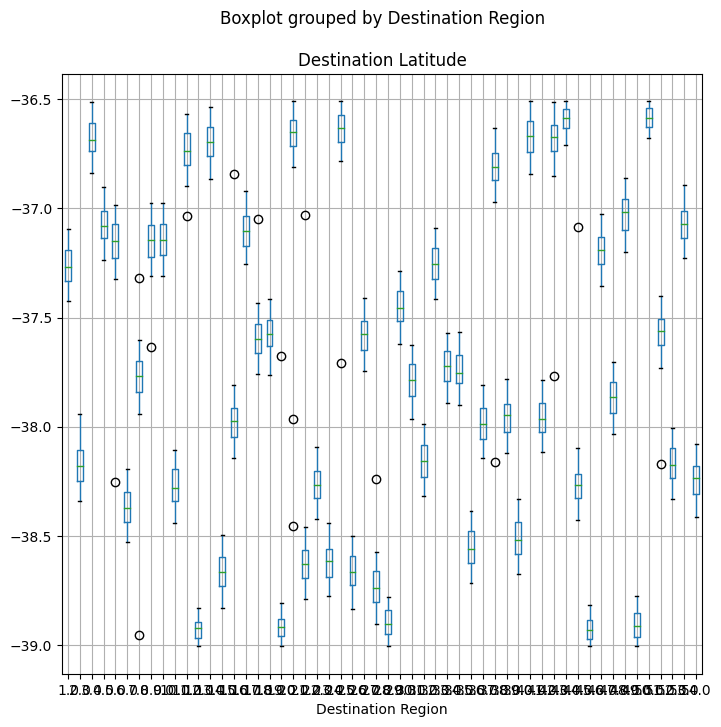

In [78]:
data.boxplot(column='Destination Latitude', by = 'Destination Region',figsize = (8,8))

Similar to origin regions, even a few destination regions are incorrect.  

The approach to fix the incorrect regions would be to use the fact that regions have a definite range of latitudes and longitudes. For example, there are only a range of latitudes & longitudes for Victoria. We now have to find the range of latitudes and longitudes for every region. Note that currently in the data, there are some points with an incorrect region. From the boxplots above, we can see that these invalid points in a region have outlier latitudes / longitudes. We need to identify these records, and then compute the range of latitudes and longitudes for every region. Finally, we use the valid range of latitudes and longitudes to fix the incorrect regions and impute missing regions.

The first step would be to consolidate the origin and destination regions into a single dataset with all regions, latitudes and longitudes.

In [79]:
origin_data = data.loc[data['Origin Region'].notna(),['Origin Region', 'Origin Latitude', 'Origin Longitude']]
col = ['Region', 'Latitude', 'Longitude']
origin_data.columns = col

destination_data = data.loc[data['Destination Region'].notna(),['Destination Region', 
                                                                'Destination Latitude', 'Destination Longitude']]
destination_data.columns = col

#Consolidating origin and destination data
region_data = pd.concat([origin_data,destination_data],ignore_index = True)

Calculating the statistics for latitudes to identify the incorrect latitudes:

In [80]:
lat_stats = region_data.groupby("Region")["Latitude"].quantile([0.25,0.5,0.75]).unstack(level = 1)
lat_stats.columns = ['Lat Quartile 1', 'Lat Quartile 2', 'Lat Quartile 3']
lat_stats['Lat IQR'] = lat_stats['Lat Quartile 3'] - lat_stats['Lat Quartile 1']
lat_stats['Lat Lower Bound'] = lat_stats['Lat Quartile 1'] - 1.5 * lat_stats['Lat IQR']
lat_stats['Lat Upper Bound'] = lat_stats['Lat Quartile 3'] + 1.5 * lat_stats['Lat IQR']

Calculating the statistics for longitudes to identify the incorrect longitudes:

In [81]:
long_stats = region_data.groupby("Region")["Longitude"].quantile([0.25,0.5,0.75]).unstack(level = 1)
long_stats.columns = ['Long Quartile 1', 'Long Quartile 2', 'Long Quartile 3']
long_stats['Long IQR'] = long_stats['Long Quartile 3'] - long_stats['Long Quartile 1']
long_stats['Long Lower Bound'] = long_stats['Long Quartile 1'] - 1.5 * long_stats['Long IQR']
long_stats['Long Upper Bound'] = long_stats['Long Quartile 3'] + 1.5 * long_stats['Long IQR']

Consolidating the statistics of latitudes and longitudes into a single data frame:

In [82]:
region_stats = pd.concat([lat_stats, long_stats], axis = 1)
region_stats.head()

,Lat Quartile 1,Lat Quartile 2,Lat Quartile 3,Lat IQR,Lat Lower Bound,Lat Upper Bound,Long Quartile 1,Long Quartile 2,Long Quartile 3,Long IQR,Long Lower Bound,Long Upper Bound
Region,,,,,,,,,,,,
1.0,-37.329034,-37.262467,-37.190731,0.138303,-37.536488,-36.983277,147.544489,147.636532,147.731074,0.186585,147.264611,148.010951
2.0,-38.251040,-38.179234,-38.106032,0.145008,-38.468552,-37.888520,145.081580,145.168288,145.246825,0.165245,144.833712,145.494693
3.0,-36.739605,-36.683037,-36.606361,0.133243,-36.939469,-36.406497,146.139074,146.223786,146.314599,0.175525,145.875786,146.577887
4.0,-37.128210,-37.078254,-37.011315,0.116895,-37.303552,-36.835972,142.812094,142.873426,142.926515,0.114422,142.640461,143.098147
5.0,-37.225597,-37.151802,-37.075251,0.150346,-37.451117,-36.849732,148.235376,148.311843,148.375610,0.140234,148.025025,148.585962


Defining a function to identify the records with incorrect regions: The function uses the fact that the invalid points have outlier latitudes / longitudes.

In [83]:
def InvalidRegionChecker(region,lat,long):
    lat_lower_bound = region_stats.loc[region,'Lat Lower Bound']
    lat_upper_bound = region_stats.loc[region,'Lat Upper Bound']
    long_lower_bound = region_stats.loc[region,'Long Lower Bound']    
    long_upper_bound = region_stats.loc[region,'Long Upper Bound']
    output = (lat > lat_lower_bound) and (lat < lat_upper_bound) and \
        (long > long_lower_bound) and (long < long_upper_bound)
    return output

Applying the function "Invalid Region Checker" to the origin regions:

In [84]:
data_org_validation = data.loc[data['Origin Region'].notna(),]
data_org_validation = data_org_validation.assign(Origin_Region_Validity = True)
data_org_validation.loc[:,['Origin_Region_Validity']] = np.vectorize(InvalidRegionChecker)(
                                                        data_org_validation['Origin Region'],
                                                        data_org_validation['Origin Latitude'],
                                                        data_org_validation['Origin Longitude'])

In [85]:
#data_org_validation.loc[da`ta_org_validation['Origin_Region_Validity'] == 0,
                                                #['Origin_Region_Validity']].shape
invalid_org_reg_ix = data_org_validation.loc[data_org_validation['Origin_Region_Validity'] == 0, ].index
data.loc[invalid_org_reg_ix,'Origin Region']

271      11.0
2329     24.0
4349     49.0
6399     53.0
10522     6.0
12389    51.0
12562    45.0
12578    45.0
14585     9.0
14615    23.0
14629    26.0
16636    53.0
16656     9.0
20734     2.0
24845    45.0
26894     6.0
26901    39.0
26911    28.0
28934     6.0
35883    22.0
Name: Origin Region, dtype: float64

Based on the output of the function, the above rows have invalid origin region.  

Applying the function to the destination region:

In [86]:
data_dest_validation = data.loc[data['Destination Region'].notna(),]
data_dest_validation = data_dest_validation.assign(Destination_Region_Validity = True)
data_dest_validation.loc[:,['Destination_Region_Validity']] = np.vectorize(InvalidRegionChecker)(
                                                                data_dest_validation['Destination Region'],
                                                                data_dest_validation['Destination Latitude'],
                                                                data_dest_validation['Destination Longitude'])

Identifying the rows with incorrect destination region:

In [87]:
data_dest_validation.loc[data_dest_validation['Destination_Region_Validity'] == 0,
                                                ['Destination Region', 'Destination Latitude', 'Destination Longitude']].head()
invalid_dest_reg_ix = data_dest_validation.loc[data_dest_validation['Destination_Region_Validity'] == 0, ].index
invalid_dest_reg_ix

Int64Index([ 1758,  2362,  4399,  8491,  8584, 10293, 19383, 20534, 20798,
            20813, 24913, 26953, 29015, 33081, 33106, 33745, 35124, 35139,
            35155, 35157],
           dtype='int64')

Filtering the regions data set to contain only valid origin and destination regions by excluding the identifed incorrect origin and destination regions:

In [88]:
origin_data_2 = data_org_validation.loc[(data_org_validation['Origin Region'].notna()) & 
                                        (data_org_validation['Origin_Region_Validity'] == 1),
                                         ['Origin Region', 'Origin Latitude', 'Origin Longitude']]
col = ['Region', 'Latitude', 'Longitude']
origin_data_2.columns = col

destination_data_2 = data_dest_validation.loc[(data_dest_validation['Destination Region'].notna()) &
                                              (data_dest_validation['Destination_Region_Validity'] == 1),
                                            ['Destination Region', 'Destination Latitude', 'Destination Longitude']]
destination_data_2.columns = col

region_data_2 = pd.concat([origin_data_2,destination_data_2],ignore_index = True)

Computing the valid range - Minimum and Maximum latitude and longitude for all the regions:

In [89]:
lat_stats_2 = region_data_2.groupby("Region")["Latitude"].quantile([0,1]).unstack(level = 1)
lat_stats_2.columns = ['Lat Minimum', 'Lat Maximum']

long_stats_2 = region_data_2.groupby("Region")["Longitude"].quantile([0,1]).unstack(level = 1)
long_stats_2.columns = ['Long Minimum', 'Long Maximum']
region_stats_2 = pd.concat([lat_stats_2, long_stats_2], axis = 1)
region_stats_2.head()

,Lat Minimum,Lat Maximum,Long Minimum,Long Maximum
Region,,,,
1.0,-37.422914,-37.092197,147.415660,147.839584
2.0,-38.340947,-38.010843,144.956294,145.380777
3.0,-36.839860,-36.513296,146.017704,146.432470
4.0,-37.238491,-36.902818,142.770218,143.004406
5.0,-37.322401,-36.983859,148.128634,148.450807


Defining a function Region Imputer to impute missing regions and fix incorrect regions: The function takes latitude and longitude as the input, and returns the correct region. It identifies the correct region for a given latitude and longitude if it is in the valid range of latitudes and longitudes for that region.

In [90]:
def RegionImputer(lat,long):
    region = region_stats_2.loc[(region_stats_2['Lat Minimum'] <= lat) & (region_stats_2['Lat Maximum'] >= lat)
                 & (region_stats_2['Long Minimum'] <= long) & (region_stats_2['Long Maximum'] >= long),].index[0]
    return region

Applying the Region Imputer function to the incorrect origin regions:

In [91]:
data.loc[invalid_org_reg_ix,['Origin Region']] = np.vectorize(RegionImputer)(data.loc[invalid_org_reg_ix,'Origin Latitude'],
                                                              data.loc[invalid_org_reg_ix,'Origin Longitude'])

#data.loc[invalid_org_reg_ix,['Origin Region']]

Applying the Region Imputer function to the incorrect destination regions: 

In [92]:
data.loc[invalid_dest_reg_ix,['Destination Region']] = np.vectorize(RegionImputer)(data.loc[invalid_dest_reg_ix,
                                            'Destination Latitude'],data.loc[invalid_dest_reg_ix,'Destination Longitude'])

#data.loc[invalid_dest_reg_ix,['Destination Region']]

Applying the Region Imputer function to the missing origin regions:

In [93]:
data.loc[data['Origin Region'].isna(),['Origin Region']] = np.vectorize(RegionImputer)(
    data.loc[data['Origin Region'].isna(),'Origin Latitude'],
    data.loc[data['Origin Region'].isna(),'Origin Longitude'])

Applying the Region Imputer function to the missing destination regions:

In [94]:
data.loc[data['Destination Region'].isna(),['Destination Region']] = np.vectorize(RegionImputer)(
    data.loc[data['Destination Region'].isna(),'Destination Latitude'],
    data.loc[data['Destination Region'].isna(),'Destination Longitude'])

The Origin and Destination Regions are now fixed. 

### 3.4 Coverage Anomalies

As the name suggests, coverage anomalies include missing values or missing tuples. 

From the first data summary, the below table is populated with the missing values by column.  

Missing values: # of records in the data
- Drone Type: 10 (Handled in Section 3.3)
- Post Type: 10
- Origin Region: 10 (Handled in Section 3.3)
- Destination Region: 10 (Handled in Section 3.3)
- Travel Time: 40 (Handled in Section 3.3)
- Delivery Fare: 30

We need to fill the missing values for Post Type and Delivery Fare.We know that the Delivery Fare has a linear relationship with some other attributes, we can do a linear regression imputation. For Post Type, it isn't very clear if the values are actually missing and if they are, what is the best approach to follow?

In [95]:
#data.describe(include = 'all')

#### 3.4.1 Post Type Handling Missing Values

As mentiond above,before going with a guess-based estimation, we need to be certain that they are actually missing. We can examine the relationship of Post Type with other columns and try to identify the normal and express delvieries.


Summary of the numeric variables by Post Type:

In [96]:
pd.pivot_table(data, index=['Post Type'],values=['Package Weight', 'Journey Distance',
                                                  'Travel Time', 'Delivery Fare'], 
                                                  aggfunc = np.mean)

,Delivery Fare,Journey Distance,Package Weight,Travel Time
Post Type,,,,
0.0,131.996313,222.514188,25.721165,211.275793
1.0,162.941100,222.465684,25.759531,211.143241


We can see that the delivery fare varies based on the Post Type. It makes sense because the express deliveries are usually costlier than the regular deliveries. Interesting observation, which can be used during the linear regression of delivery fare.  

Comparing the Post Type with categorical variables:  

Post Type vs. Drone Type

In [97]:
pd.crosstab(data['Drone Type'],data['Post Type'], normalize = 'columns')

Post Type,0.0,1.0
Drone Type,,
1.0,0.503419,0.499584
2.0,0.297044,0.304388
3.0,0.199536,0.196028


No trends with the Drone Type.  

Post Type vs. Departure Time Period

In [98]:
pd.crosstab(data['Post Type'],data['Departure Time Period'], normalize = 'columns')

Departure Time Period,Afternoon,Morning,Night
Post Type,,,
0.0,0.696074,0.70627,0.704041
1.0,0.303926,0.29373,0.295959


Again, no trends here.

Post Type vs. Origin Region & Destination Region

In [99]:
pd.crosstab(data['Post Type'],data['Origin Region'], normalize = 'columns')
#pd.crosstab(data['Post Type'],data['Destination Region'], normalize = 'columns')

Origin Region,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0
Post Type,,,,,,,,,,,,,,,,,,,,,
0.0,0.67236,0.704403,0.70219,0.722571,0.704036,0.723589,0.67162,0.692837,0.68855,0.711988,...,0.724595,0.712798,0.695527,0.68845,0.699405,0.693333,0.734328,0.711864,0.68125,0.685325
1.0,0.32764,0.295597,0.29781,0.277429,0.295964,0.276411,0.32838,0.307163,0.31145,0.288012,...,0.275405,0.287202,0.304473,0.31155,0.300595,0.306667,0.265672,0.288136,0.31875,0.314675


No trends with the regions as well.

Post Type vs. ID  
Every row has a unique ID, we cannot see any summary here. Observing the first few IDs of normal and express post types:  

In [100]:
data.loc[data['Post Type'] == 0,['Post Type', 'Id']].head()

,Post Type,Id
0,0.0,ID1708827283
2,0.0,ID1113899320
10,0.0,ID1558206110
11,0.0,ID1769668883
12,0.0,ID1591938339


In [101]:
data.loc[data['Post Type'] == 1,['Post Type', 'Id']].head()

,Post Type,Id
1,1.0,ID5418237997
3,1.0,ID5760876185
4,1.0,ID5551699692
5,1.0,ID5865299727
6,1.0,ID5643023605


Wait a second, let's take a close look at the IDs by the Post Type. The normal Post Types start with 1 while the express Post Types start with 5. So, the values of Post Types aren't actually missing. Filling the post types based on the ID:  

In [102]:
def fillPostType(Id):
    if Id[2] == '1': 
        return 0 # normal
    elif Id[2] == '5':
        return 1 # express
    else:
        return None
    
data.loc[data['Post Type'].isna(),'Post Type'] = data.loc[data['Post Type'].isna(),'Id'].apply(fillPostType)
data['Post Type'].isna().sum() # Check

0

#### 3.3.4 Delivery Fare: Outlier Detection and Missing Value Handling

We know that delivery fare has a linear relationship with some variables in the dataset. So, it makes sense to do a regression imputation of missing values here. 

We also know that there are outliers for delivery fare from the boxplot of delivery fare above. If you forgot about it after fixing so many other errors, let's plot it again.

<Axes: >

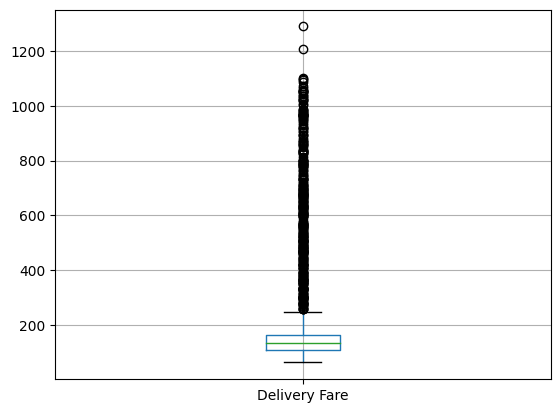

In [103]:
data.boxplot(column='Delivery Fare') #, figsize = (8,8))

Summary of Delivery Fare:

In [104]:
data['Delivery Fare'].describe()

count    36259.000000
mean       141.228787
std         62.302338
min         64.060000
25%        107.810000
50%        133.320000
75%        164.295000
max       1288.740000
Name: Delivery Fare, dtype: float64

We can clearly see there are outliers in Delivery Fare and most of them are on the higher side i.e. the fare is higher.  

Before doing the regression, we need to examine the relationships between delivery fare and the other variables. This will help us in selecting variables for the regression model.

Delivery Fare vs. Drone Type:

<Axes: title={'center': 'Delivery Fare'}, xlabel='Drone Type'>

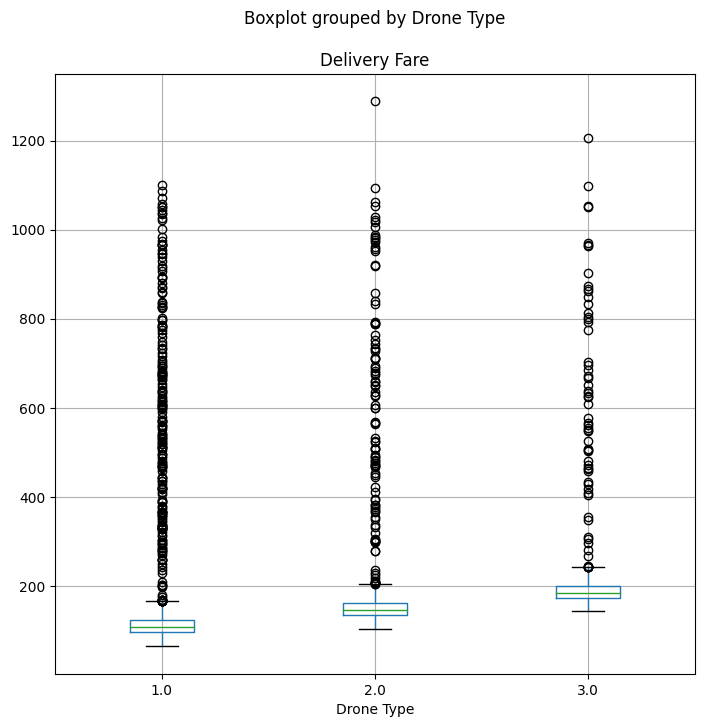

In [105]:
data.boxplot(column='Delivery Fare', by = 'Drone Type',figsize = (8,8))

It is very evident that on average the fare of Drone Type 3 > Drone Type 2 > Drone Type 1. Drone Type is a good candidate for the model

Delivery Fare vs. Post Type:

<Axes: title={'center': 'Delivery Fare'}, xlabel='Post Type'>

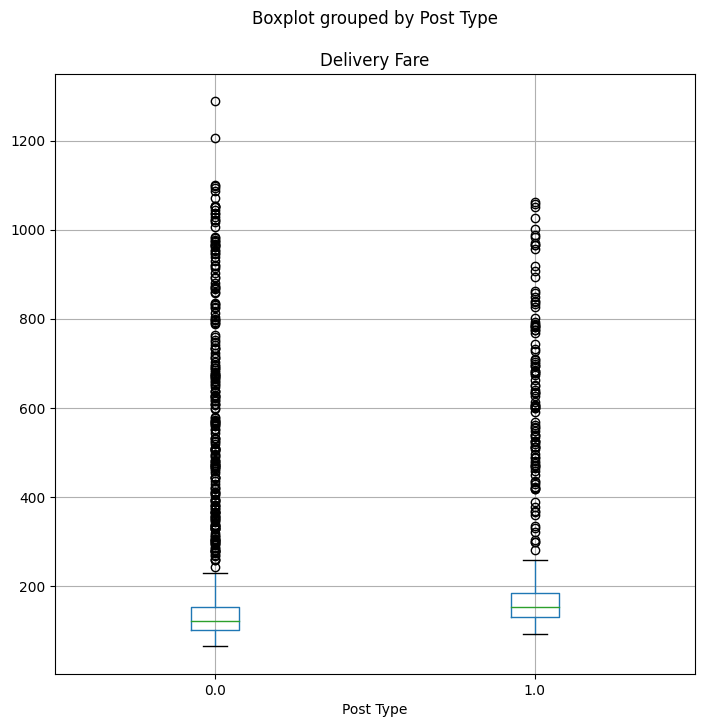

In [106]:
data.boxplot(column='Delivery Fare', by = 'Post Type',figsize = (8,8))

From the boxplot and the summary of post type earlier, we know that express deliveries are on average more costlier than normal deliveries. Post Type is also a good candidate to be included in the model.  

Delivery Fare vs. Departure Time Period:

<Axes: title={'center': 'Delivery Fare'}, xlabel='Departure Time Period'>

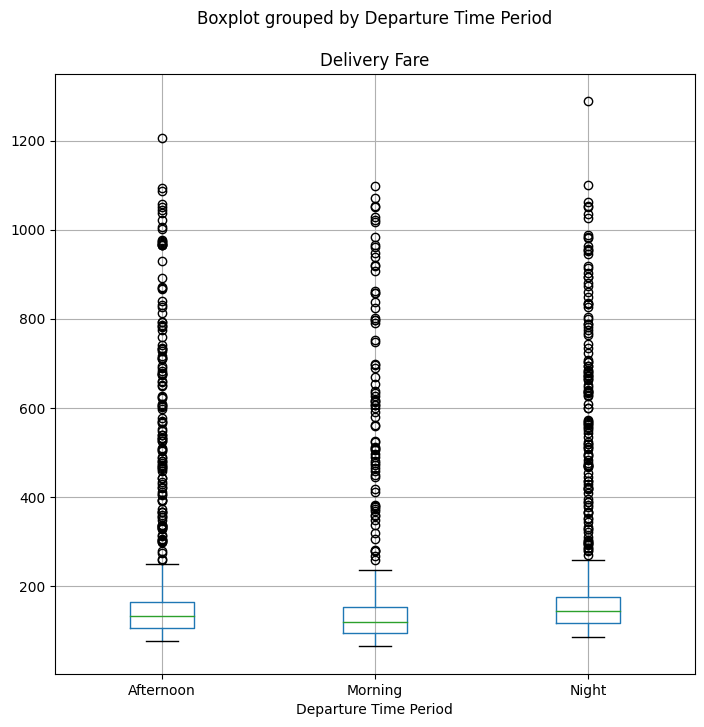

In [107]:
data.boxplot(column='Delivery Fare', by = 'Departure Time Period',figsize = (8,8))

There isn't too much variation here, but the morning departures are likely to be less costlier than afternoon and night departures.

Delivery Fare vs. Delivery Time Period:

<Axes: title={'center': 'Delivery Fare'}, xlabel='Delivery Time Period'>

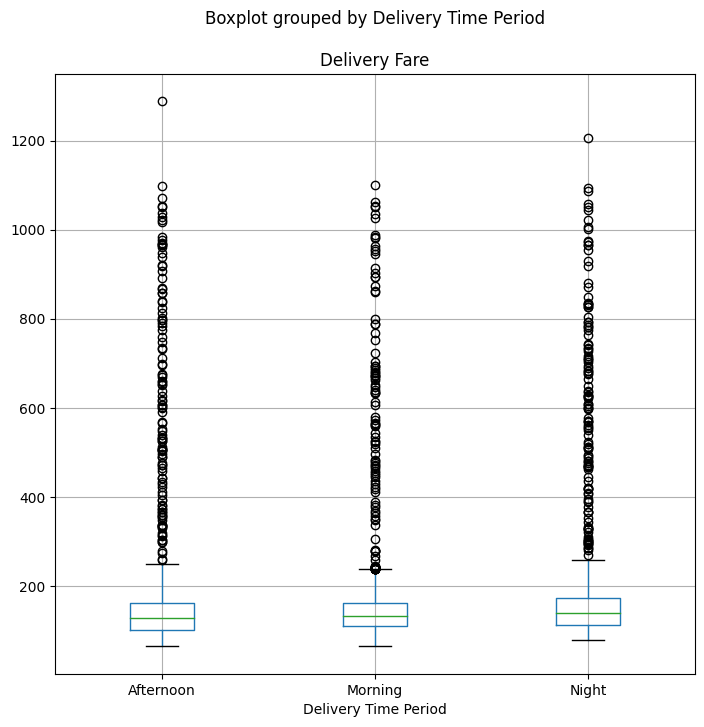

In [108]:
data.boxplot(column='Delivery Fare', by = 'Delivery Time Period',figsize = (8,8))

Not too much variation here. Delivery Time Period isn't a good variable for the regression model.  

Delivery Fare vs. Package Weight:

<Axes: xlabel='Delivery Fare', ylabel='Package Weight'>

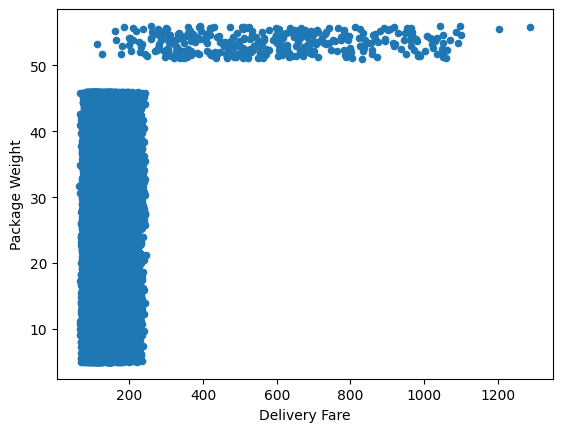

In [109]:
data.plot.scatter(x = 'Delivery Fare', y = 'Package Weight')

There seems to be no clear trend here. Even the heavy packages with weight > 50, have delivery fares ranging from ~150 to 1200. Package weight does not seem to be a good variable for the model.    

Delivery Fare vs. Journey Distance:

<Axes: xlabel='Delivery Fare', ylabel='Journey Distance'>

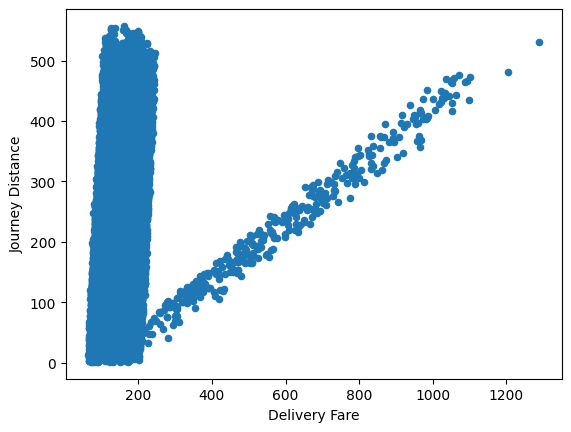

In [110]:
data.plot.scatter(x = 'Delivery Fare', y = 'Journey Distance')

There is a linear trend with Journey Distance. Journey Distance seems to be a good candidate for the model.  It is to be noted that there are some points (possibly outliers) that deviate from the trend line and have a much flatter line (or non-linear relationship) with Delivery Fare. 

Delivery Fare vs. Travel Time:

<Axes: xlabel='Delivery Fare', ylabel='Travel Time'>

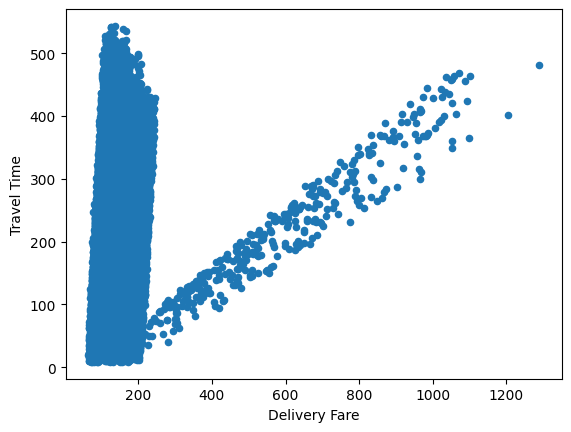

In [111]:
data.plot.scatter(x = 'Delivery Fare', y = 'Travel Time')

Exactly same comment as Journey Distance. We should not include Travel Time, if we are including Journey Distance and Drone Type. These variables are related and we would run into multi-collinearity issues.  

We are done with the EDA for delivery fare and have some idea for good candidates in the model. We need to prepare the input data for the model.  

Converting categorical variables to (n-1) dummy variables, where n is the number of categories:

In [112]:
# Drone Type Categories to Dummy Variables
drone_type_categories = pd.get_dummies(data['Drone Type'], drop_first = True)
drone_type_categories.columns = ['Drone Type 2','Drone Type 3' ]
data = pd.concat([data,drone_type_categories],axis = 1)

# Convert time period variables to categorical variables
data['Delivery Time Period'] = data['Delivery Time Period'].astype('category')
data['Departure Time Period'] = data['Delivery Time Period'].astype('category')

# Departure Time Period Categories to Dummy Variables
departure_time_categories = pd.get_dummies(data['Departure Time Period'], drop_first = True)
departure_time_categories.columns = ['Departure Morning','Departure Night' ]
data = pd.concat([data,departure_time_categories],axis = 1)


# Delivery Time Period Categories to Dummy Variables
delivery_time_categories = pd.get_dummies(data['Delivery Time Period'], drop_first = True)
delivery_time_categories.columns = ['Delivery Morning','Delivery Night' ]
data = pd.concat([data,delivery_time_categories],axis = 1)

Checking that the dummification happened correctly for Drone Type:

In [113]:
data.loc[:5, ['Drone Type', 'Drone Type 2','Drone Type 3' ]]

,Drone Type,Drone Type 2,Drone Type 3
0,1.0,0,0
1,2.0,1,0
2,3.0,0,1
3,2.0,1,0
4,3.0,0,1
5,2.0,1,0


Everything seems okay.  

Checking that the dummification happened correctly for Departure Time Period:

In [114]:
data.loc[:5, ['Departure Time Period', 'Departure Morning','Departure Night' ]]

,Departure Time Period,Departure Morning,Departure Night
0,Night,0,1
1,Afternoon,0,0
2,Afternoon,0,0
3,Morning,1,0
4,Afternoon,0,0
5,Night,0,1


Everything seems okay.  

Checking that the dummification happened correctly for Delivery Time Period:

In [115]:
data.loc[:5, ['Delivery Time Period', 'Delivery Morning','Delivery Night' ]]

,Delivery Time Period,Delivery Morning,Delivery Night
0,Night,0,1
1,Afternoon,0,0
2,Afternoon,0,0
3,Morning,1,0
4,Afternoon,0,0
5,Night,0,1


We also need to standardise the numeric variables with mean 0 and variance 1. Doing the standardisation of numeric columns using SciPy preprocessor:

In [116]:
# Standardizing Numeric Columns
data['Scaled Journey Distance'] = preprocessing.scale(data['Journey Distance'])
data['Scaled Travel Time'] = preprocessing.scale(data['Travel Time'])
data['Scaled Package Weight'] = preprocessing.scale(data['Package Weight'])
data.loc[:, ['Scaled Journey Distance', 'Scaled Travel Time', 'Scaled Package Weight']].describe()

,Scaled Journey Distance,Scaled Travel Time,Scaled Package Weight
count,3.628900e+04,3.628900e+04,3.628900e+04
mean,1.219841e-16,-1.147395e-16,-1.523333e-16
std,1.000014e+00,1.000014e+00,1.000014e+00
min,-1.894312e+00,-1.876957e+00,-1.710744e+00
25%,-7.837857e-01,-7.831106e-01,-8.562244e-01
50%,-1.189239e-01,-1.152353e-01,-1.408363e-02
75%,6.956373e-01,6.865482e-01,8.528964e-01
max,2.866262e+00,3.075149e+00,2.497650e+00


The standardisation happened correctly.Last but not the least, we need to drop the records with missing values: here we need to drop 30 records with missing delivery fares.

In [117]:
data_for_fit = data.dropna()
data_for_fit.shape

(36259, 27)

We now have 36,259 records for the linear regression model.  

Fitting the Linear regression model using the columns in the "fit_columns". From the EDA done above and various iterations, the variables to be included in the model are Drone Type, Post Type, Journey Distance and Departure Time Period.

In [118]:
lm_fare = LinearRegression()

# Inputs to the model
#fit_columns = ['Post Type','Drone Type','Journey Distance', 'Travel Time']
fit_columns = [ 'Scaled Journey Distance', 'Drone Type 2', 'Drone Type 3', 'Post Type' 
               ,'Departure Morning', 'Departure Night']

# Splitting into train and test
x_train, x_test, y_train, y_test = train_test_split(data_for_fit.loc[:,fit_columns],
                                                    data_for_fit.loc[:,['Delivery Fare']],random_state=1)

lm_fare.fit(x_train,y_train)

LinearRegression()

Predicting the values in the test dataset and printing the coefficients and R-Squared value:

In [119]:
y_pred = lm_fare.predict(x_test)

print('Coefficients: \n', lm_fare.coef_)
print ('r-squared for this model = ',lm_fare.score(x_test,y_test))

Coefficients: 
 [[11.95846969 37.33331529 75.32724713 31.20358365  6.0332718  11.11701827]]
r-squared for this model =  0.33308464316914366


R-Squared value is very low at 33%, this could be because of outliers. We see from the plots above that the outliers have  very different trends than the other records, influencing the regression line.  

Calculating and plotting the residuals:

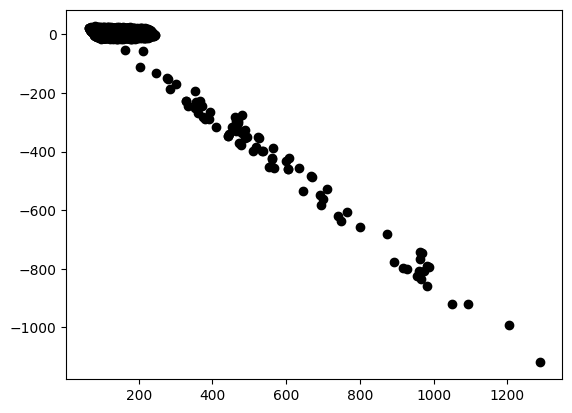

In [120]:
residuals = y_pred - y_test

# Plot residuals
plt.scatter(y_test, residuals, color='black')

plt.show()

The residuals are not random, with a few residuals being very high indicating a bad linear regression model.  

Doing a boxplot of the residuals: 

<Axes: >

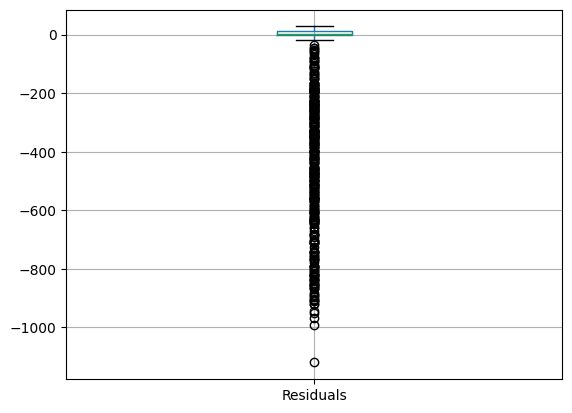

In [121]:
pd.options.mode.chained_assignment = None
data_for_fit['Predicted Delivery Fare'] = lm_fare.predict(data_for_fit.loc[:,fit_columns])
data_for_fit['Residuals'] = data_for_fit['Predicted Delivery Fare'] - data_for_fit['Delivery Fare']
data_for_fit.boxplot(column='Residuals')

Quick summary of the residuals:  

In [122]:
data_for_fit['Residuals'].describe()

count    36259.000000
mean         0.035459
std         51.412477
min      -1119.716448
25%         -2.501888
50%          2.408214
75%         12.210477
max         27.639916
Name: Residuals, dtype: float64

Since this regression model is very bad, let us try and fit a model after removing outliers. The outliers here are those points with residuals outside the whiskers in the boxplot. Mathematically, these residuals are further than the third / first quartile by than 1.5 times Inter-Quartile Range.  


Computing the critical values / thresholds for the residuals:

In [123]:
quartiles_2 = data_for_fit['Residuals'].quantile([0.25,0.5,0.75])
IQR = quartiles_2.iloc[2,] - quartiles_2.iloc[0,]
critical_value_1 = quartiles_2.iloc[2,] + 1.5 * IQR
critical_value_2 = quartiles_2.iloc[0,] - 1.5 * IQR
print(critical_value_2,critical_value_1)

-24.570434584190902 34.27902407446521


In [124]:
data_for_fit.loc[(data_for_fit['Residuals'] > -35) & (data_for_fit['Residuals'] < -25), 'Residuals']

34596   -33.924251
Name: Residuals, dtype: float64

We have residuals only in direction where the delivery is higher than the predicted delivery fare by 25.  

Identifying the outlier indices and storing them in "lm_outliers_indices":

In [125]:
lm_outliers = data_for_fit.loc[(data_for_fit['Residuals'] < critical_value_2) |
                              (data_for_fit['Residuals'] > critical_value_1),
                                ['Drone Type', 'Post Type', 'Journey Distance','Travel Time',
                                 'Delivery Fare', 'Predicted Delivery Fare']]
lm_outliers_indices = lm_outliers.index
len(lm_outliers_indices)

360

There are 360 outliers in the data.  

Dropping the outliers:

In [126]:
# Dropping Outliers
data_for_fit.drop(lm_outliers_indices, axis=0, inplace=True)
data_for_fit.shape

(35899, 29)

We now have 35,899 rows. Fitting a regression model for these rows:

In [127]:
#fit_columns = [ 'Scaled Journey Distance', 'Drone Type 2', 'Drone Type 3', 'Post Type']
               #, 'Departure Morning', 'Departure Night']


x_train, x_test, y_train, y_test = train_test_split(data_for_fit.loc[:,fit_columns],
                                                    data_for_fit.loc[:,['Delivery Fare']],random_state=111)

lm_fare.fit(x_train,y_train)

y_pred = lm_fare.predict(x_test)

print('Coefficients: \n', lm_fare.coef_)
print ('r-squared for this model = ',lm_fare.score(x_test,y_test))

Coefficients: 
 [[ 9.38106163 38.806556   77.4632979  30.42253059  5.64678141 11.02122686]]
r-squared for this model =  0.948734445168369


The R-Squared value jumped astonomically to 95% after removing outliers!!  

Plotting residuals:

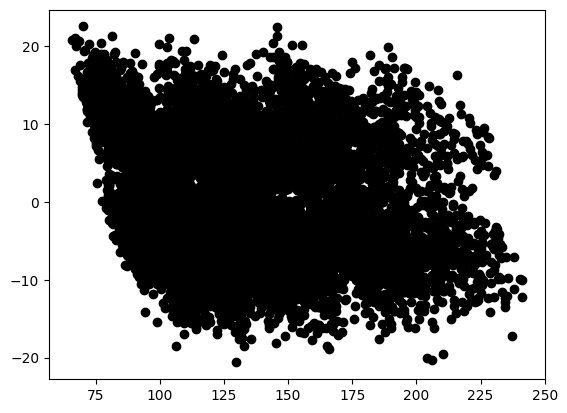

In [128]:
residuals = y_pred - y_test
# Plot residuals
plt.scatter(y_test, residuals, color='black')

plt.show()

The residuals are random satisfying the assumptions of a linear model. Doing a boxplot of the residuals:  

<Axes: >

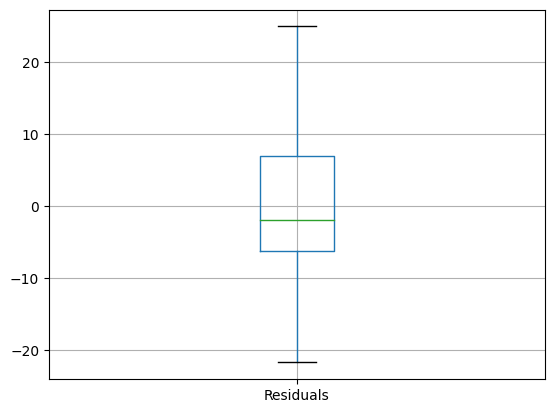

In [129]:
pd.options.mode.chained_assignment = None
data_for_fit['Predicted Delivery Fare'] = lm_fare.predict(data_for_fit.loc[:,fit_columns])
data_for_fit['Residuals'] = data_for_fit['Predicted Delivery Fare'] - data_for_fit['Delivery Fare'] 

data_for_fit.boxplot(column='Residuals') #,figsize = (8,8))

There are no outliers in the residuals now indicating that the model is doing a good job at fitting the data.  

Using the regression model to impute the missing values for Delivery Fare:  

In [130]:
# Impute Missing Values for Delivery Fare
data.loc[data['Delivery Fare'].isna(),['Delivery Fare']] = lm_fare.predict(data.loc[data['Delivery Fare'].isna(),fit_columns])

Finally, we have completed cleaning the data. Time to get rid of the extra columns and write the output data to a csv file:

In [131]:
# Getting rid of all extra columns and outlier rows
output_data = data.iloc[~data.index.isin(lm_outliers_indices),:16]
output_data.shape

(35929, 16)

We have 35929 rows in the cleaned dataset. Formatting the output to the same format as the input file:

In [132]:
# Getting output into correct format # rounding numneric variables to correct decimals as in input format
output_data['Package Weight'] = round(output_data['Package Weight'],3)
output_data['Origin Latitude'] = round(output_data['Origin Latitude'],7)
output_data['Origin Longitude'] = round(output_data['Origin Longitude'],7)
output_data['Destination Latitude'] = round(output_data['Destination Latitude'],7)
output_data['Destination Longitude'] = round(output_data['Destination Longitude'],7)
output_data['Journey Distance'] = round(output_data['Journey Distance'],3)
output_data['Travel Time'] = round(output_data['Travel Time'],2)
output_data['Delivery Fare'] = round(output_data['Delivery Fare'],2)

output_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35929 entries, 0 to 36288
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     35929 non-null  object 
 1   Drone Type             35929 non-null  float64
 2   Post Type              35929 non-null  float64
 3   Package Weight         35929 non-null  float64
 4   Origin Region          35929 non-null  float64
 5   Destination Region     35929 non-null  float64
 6   Origin Latitude        35929 non-null  float64
 7   Origin Longitude       35929 non-null  float64
 8   Destination Latitude   35929 non-null  float64
 9   Destination Longitude  35929 non-null  float64
 10  Journey Distance       35929 non-null  float64
 11  Departure Date         35929 non-null  object 
 12  Departure Time         35929 non-null  object 
 13  Travel Time            35929 non-null  float64
 14  Delivery Time          35929 non-null  object 
 15  De

Final check:

In [133]:
output_data.describe()

,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Travel Time,Delivery Fare
count,35929.000000,35929.000000,35929.000000,35929.000000,35929.000000,35929.000000,35929.000000,35929.000000,35929.000000,35929.000000,35929.000000,35929.000000
mean,1.697264,0.298283,25.453475,27.456344,27.341563,-37.734499,145.610264,-37.735331,145.602337,222.451705,211.175058,136.738201
std,0.780277,0.457511,11.855137,15.543010,15.517972,0.752112,1.776074,0.751547,1.781900,116.786221,108.050510,35.818734
min,1.000000,0.000000,5.000000,1.000000,1.000000,-39.006991,142.770293,-39.006991,142.770218,1.275000,8.410000,64.060000
25%,1.000000,0.000000,15.259000,14.000000,14.000000,-38.345236,144.029128,-38.344896,144.009057,130.974000,126.590000,107.550000
50%,1.000000,0.000000,25.356000,27.000000,27.000000,-37.758938,145.522476,-37.757550,145.509971,208.542000,198.780000,132.920000
75%,2.000000,1.000000,35.761000,41.000000,41.000000,-37.092715,147.194122,-37.091297,147.187952,303.665000,285.400000,163.280000
max,3.000000,1.000000,55.259000,54.000000,54.000000,-36.507766,148.450906,-36.507766,148.450906,557.218000,543.530000,244.910000


In [134]:
output_data.to_csv('drone_packages_cleaned.csv', index = False)

## 4. Modelling Outliers

As observed, the outliers were the records where the delivery fare was greater than the predicted delivery fare from the linear model by 25. The delivery fare of the outliers have a different relationship with the variables. Let's try to establish relationship of the outliers:  

In [135]:
outlier_data = data.iloc[lm_outliers_indices,]
outlier_data.shape

(360, 27)

In [136]:
#outlier_data['Journey Distance Squared'] = outlier_data['Journey Distance'] * outlier_data['Journey Distance']
outlier_data['Scaled Journey Distance'] = preprocessing.scale(outlier_data['Journey Distance'])
#outlier_data['Scaled Journey Distance Squared'] = preprocessing.scale(outlier_data['Journey Distance Squared'])

In [137]:
fit_columns = [ 'Journey Distance'] #'Drone Type 2', 'Drone Type 3', 'Post Type', 
               #'Departure Morning', 'Departure Night']


x_train, x_test, y_train, y_test = train_test_split(outlier_data.loc[:,fit_columns],
                                                    outlier_data.loc[:,['Delivery Fare']],random_state=111)

lm_fare.fit(x_train,y_train)

y_pred = lm_fare.predict(x_test)

print('Coefficients: \n', lm_fare.coef_)
print ('r-squared for this model = ',lm_fare.score(x_test,y_test))

Coefficients: 
 [[2.10704516]]
r-squared for this model =  0.9796667688921595


**We have 98% accuracy for the delivery fare of the outliers by using only the Journey Distance. The outliers have been injected by tampering the Journey Distance.**

In [138]:
outlier_data['Journey Distance'].describe()

count    360.000000
mean     226.716486
std      116.472444
min        1.499000
25%      129.264000
50%      212.336500
75%      307.039250
max      530.404000
Name: Journey Distance, dtype: float64

## 5. Summary

In this task, the data about the deliveries of packages using drones was cleaned and written to a data file for downstream analytics. A structured approach was followed for the data cleansing process helping to complete the task more efficiently. The order followed was understanding the dataset using EDA, fixing the syntactic, semantic and coverage anomalies, followed by outlier detection. All the anomalies were also fixed column by column for syntactic / coverage anomalies, relationsip by relationship for semantic anomalies.

The biggest learning from the task was the importance of cleaning the data before data processing and modelling. In this task, the R-Squared value of the linear regression model went from 33% to 95% by removing the outliers; this demonstrates the importance of cleaning the data. Data modelling was also much easier once you have cleaned the data and in the process understood the data.

## 6. References
1. Chris Albon. *Strings to Datetime*. Retrieved from https://chrisalbon.com/python/basics/strings_to_datetime/
2. Michael0x2a (2013, October 16). *Distance between two coordinates* [Response to]. Retrieved from https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
3. alko (2014, November 13). *Applying function with mutiple arguments to create a new pandas column* [Response to]. Retrieved from https://stackoverflow.com/questions/19914937/applying-function-with-multiple-arguments-to-create-a-new-pandas-column
- DMS (2014, September 11). *Swapping column values in Pandas* [Response to]. Retrieved from https://stackoverflow.com/questions/25792619/what-is-correct-syntax-to-swap-column-values-for-selected-rows-in-a-pandas-data
